# Insuranace claims- Fraud Detection Project

In [1]:
# Importing important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

## Description of dataset

### Insurance Claims- Fraud Detection
###### Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

## Loading Database

In [2]:
url = 'https://raw.githubusercontent.com/Bhushan0130/Datasets/main/Automobile_insurance_fraud.csv'
df = pd.read_csv(url, parse_dates = ['policy_bind_date', 'incident_date'])
df.shape

# (1000, 40)

(1000, 40)

In [3]:
pd.set_option('display.max_rows', None)  # to maximize the rows
pd.set_option('display.max_columns', None)  # to maximize the columns

In [4]:
df.head()  # top 5 rows

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-06-09           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    2015-01-25  Single Vehicle Collision   Side Collision      Major Damage   
1    2015-01-21             Vehicle Theft                ?      Minor Damage   
2    2015-02-22   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    2015-10-01  Single Vehicle Collision  Front Collision      Major Damage   
4    2015-02-17             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [5]:
df.sample(5)  # random one row

months_as_customer  age  policy_number policy_bind_date policy_state  \
530                 354   48         534982       2003-08-04           IL   
659                 101   32         223404       2002-01-23           IL   
414                 210   39         620020       1997-06-21           OH   
854                  30   36         364055       2001-05-14           IN   
904                  97   27         175553       2002-04-25           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
530   500/1000               2000                1526.11         5000000   
659    250/500                500                 895.14               0   
414   500/1000               1000                 984.45               0   
854   500/1000                500                1488.26               0   
904   500/1000                500                1588.26               0   

     insured_zip insured_sex insured_education_level insured_occupation  \
530       469650      FEMALE                 Masters              sales   
659       439964        MALE                      JD              sales   
414       474998        MALE               Associate       armed-forces   
854       440831      FEMALE                 College  machine-op-inspct   
904       434370      FEMALE             High School       tech-support   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
530        exercise            unmarried              0             0   
659     video-games       other-relative          52600        -30400   
414       paintball            unmarried              0             0   
854            golf                 wife              0        -63500   
904          movies              husband          56700        -49300   

    incident_date             incident_type   collision_type  \
530    2015-03-01  Single Vehicle Collision  Front Collision   
659    2015-10-01  Single Vehicle Collision  Front Collision   
414    2015-02-01             Vehicle Theft                ?   
854    2015-02-28   Multi-vehicle Collision   Side Collision   
904    2015-01-24   Multi-vehicle Collision   Side Collision   

    incident_severity authorities_contacted incident_state incident_city  \
530      Minor Damage                Police             SC      Columbus   
659      Minor Damage             Ambulance             SC      Columbus   
414      Minor Damage                  None             NC     Riverwood   
854        Total Loss                Police             WV    Northbrook   
904        Total Loss                 Other             VA     Riverwood   

         incident_location  incident_hour_of_the_day  \
530       8081 Flute Ridge                        12   
659         2352 MLK Drive                         4   
414  4615 Embaracadero Ave                         4   
854         4627 Elm Ridge                        17   
904      7835 Cherokee Hwy                        22   

     number_of_vehicles_involved property_damage  bodily_injuries  witnesses  \
530                            1               ?                2          3   
659                            1               ?                0          3   
414                            1             YES                1          2   
854                            3              NO                2          2   
904                            3             YES                2          1   

    police_report_available  total_claim_amount  injury_claim  property_claim  \
530                     YES               90240         15040           15040   
659                     YES               43600          8720            4360   
414                       ?                7800           780             780   
854                       ?               57900          5790            5790   
904                     YES               75690          8410            8410   

     vehicle_claim  auto_make auto_model  auto_y

In [6]:
df.tail()  # 5 button rows

months_as_customer  age  policy_number policy_bind_date policy_state  \
995                   3   38         941851       1991-07-16           OH   
996                 285   41         186934       2014-05-01           IL   
997                 130   34         918516       2003-02-17           OH   
998                 458   62         533940       2011-11-18           IL   
999                 456   60         556080       1996-11-11           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip insured_sex insured_education_level insured_occupation  \
995       431289      FEMALE                 Masters       craft-repair   
996       608177      FEMALE                     PhD     prof-specialty   
997       442797      FEMALE                 Masters       armed-forces   
998       441714        MALE               Associate  handlers-cleaners   
999       612260      FEMALE               Associate              sales   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
995       paintball            unmarried              0             0   
996        sleeping                 wife          70900             0   
997  bungie-jumping       other-relative          35100             0   
998    base-jumping                 wife              0             0   
999        kayaking              husband              0             0   

    incident_date             incident_type   collision_type  \
995    2015-02-22  Single Vehicle Collision  Front Collision   
996    2015-01-24  Single Vehicle Collision   Rear Collision   
997    2015-01-23   Multi-vehicle Collision   Side Collision   
998    2015-02-26  Single Vehicle Collision   Rear Collision   
999    2015-02-26                Parked Car                ?   

    incident_severity authorities_contacted incident_state incident_city  \
995      Minor Damage                  Fire             NC    Northbrook   
996      Major Damage                  Fire             SC     Northbend   
997      Minor Damage                Police             NC     Arlington   
998      Major Damage                 Other             NY     Arlington   
999      Minor Damage                Police             WV      Columbus   

       incident_location  incident_hour_of_the_day  \
995   6045 Andromedia St                        20   
996     3092 Texas Drive                        23   
997          7629 5th St                         4   
998        6128 Elm Lane                         2   
999  1416 Cherokee Ridge                         6   

     number_of_vehicles_involved property_damage  bodily_injuries  witnesses  \
995                            1             YES                0          1   
996                            1             YES                2          3   
997                            3               ?                2          3   
998                            1               ?                0          1   
999                            1               ?                0          3   

    police_report_available  total_claim_amount  injury_claim  property_claim  \
995                       ?               87200         17440            8720   
996                       ?              108480         18080           18080   
997                     YES               67500          7500            7500   
998                     YES               46980          5220            5220   
999                       ?                5060           460             920   

     vehicle_claim   auto_make auto_model  auto_year fraud_r

In [7]:
# as we can see collision_type column, property_damage and police_report_available columns are  having "?" value which
# is a null values, and need to replace with NaN value
df.replace("?", np.NaN, inplace = True)

## Information about dataset

In [8]:
df.info()
# As Non null value count for each column is not same, which indicate null values are present in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [9]:
df.dtypes

# 19 column are of numeric type and 19 columns are of object type 2 columns are of datatime format

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

## Null value checking 

In [10]:
null_value = df.isnull().sum()
null_value[null_value > 0]

# collision_type              178
# property_damage             360
# police_report_available     343
# _c39                       1000

collision_type              178
property_damage             360
police_report_available     343
_c39                       1000
dtype: int64

<AxesSubplot:>

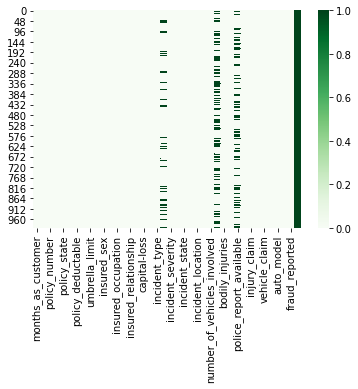

In [11]:
sns.heatmap(df.isnull(), cmap = 'Greens')

In [12]:
# null values are present in the datameans 

In [13]:
null_value_percentage = (null_value / df.shape[0] ) *100
null_value_percentage [null_value_percentage > 0]

# Null value percentage of the columns
# collision_type              17.8
# property_damage             36.0
# police_report_available     34.3
# _c39                       100.0

collision_type              17.8
property_damage             36.0
police_report_available     34.3
_c39                       100.0
dtype: float64

In [14]:
# We will perform null value impution for 'collison_type', 'property_damage' and 'police report available' columns
df.drop(columns = ['_c39'], inplace = True)  # This column is deletinig because all value of the column is null
df.shape

(1000, 39)

In [15]:
df.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

In [16]:
# collision_type              Object type
# property_damage             Object type
# police_report_available     Object type
# As these three columns are of object type, therefore we will impute mode value in the place of null value

In [17]:
mode_df = df.copy() # copy of original dataset
# mode imputation operation 
mode_df['collision_type']= mode_df['collision_type'].fillna (mode_df['collision_type'].mode()[0])
mode_df['property_damage'] = mode_df['property_damage'].fillna(mode_df['property_damage'].mode()[0])
mode_df['police_report_available'] = mode_df['police_report_available'].fillna(mode_df['police_report_available'].mode()[0])

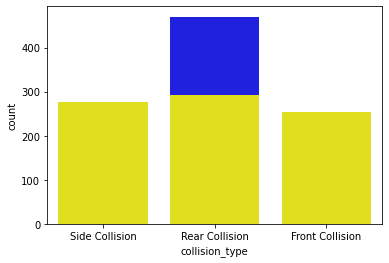

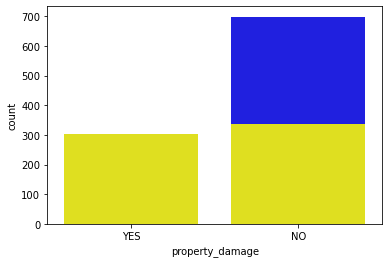

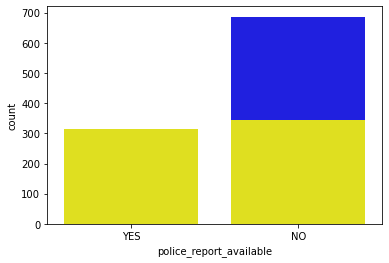

In [18]:
for i in ['collision_type', 'property_damage', 'police_report_available']:
    plt.figure()
    sns.countplot(mode_df[i], color = 'blue') 
    sns.countplot(df[i], color = 'yellow')
    
    # Blue color is indicating changes we have made in the datast after imputation

In [19]:
# Applying to original values

df['collision_type']= df['collision_type'].fillna (df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [20]:
df.isnull().sum().sum()# All null values has been replace with mean, median or mode as per their columns dtypes
# 0

0

<AxesSubplot:>

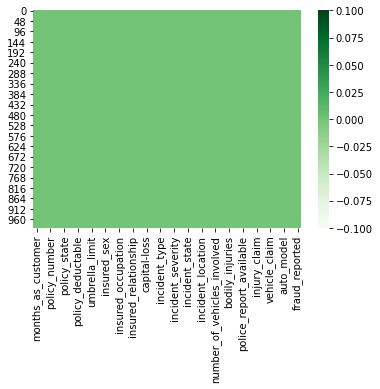

In [21]:
sns.heatmap(df.isnull(), cmap = 'Greens')

# Now, heatmpa is clean , which telling that, now no null value present in the dataset

In [22]:
# Now, data is cleaned

In [23]:
df.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

## Data Preprocessing

#### Deleting columns which are not necessary for Training the model

In [24]:
# Found these columns as un usuable for building Ml model
df.drop(columns = ['policy_number', 'incident_location' ], inplace = True)

In [25]:
df.shape
# df.dtypes

# (1000, 37)

(1000, 37)

In [26]:
object_col = df.select_dtypes(include = 'object').keys()
len(object_col)
# 18

18

In [27]:
# value count of categorical columns
for i in object_col:
    print( '------------------------------',i, ' column------------------------')
    print(df[i].value_counts())

------------------------------ policy_state  column------------------------
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
------------------------------ policy_csl  column------------------------
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
------------------------------ insured_sex  column------------------------
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
------------------------------ insured_education_level  column------------------------
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
------------------------------ insured_occupation  column------------------------
machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-force

In [28]:
# No of unique work in categorical columns
for i in object_col[1:]:
    print(i, ':', df[i].nunique())

# policy_csl : 3
# insured_sex : 2
# insured_education_level : 7
# insured_occupation : 14
# insured_hobbies : 20
# insured_relationship : 6
# incident_type : 4
# collision_type : 3
# incident_severity : 4
# authorities_contacted : 5
# incident_state : 7
# incident_city : 7
# property_damage : 2
# police_report_available : 2
# auto_make : 14
# auto_model : 39
# fraud_reported : 2

policy_csl : 3
insured_sex : 2
insured_education_level : 7
insured_occupation : 14
insured_hobbies : 20
insured_relationship : 6
incident_type : 4
collision_type : 3
incident_severity : 4
authorities_contacted : 5
incident_state : 7
incident_city : 7
property_damage : 2
police_report_available : 2
auto_make : 14
auto_model : 39
fraud_reported : 2


In [29]:
df.head(2)

months_as_customer  age policy_bind_date policy_state policy_csl  \
0                 328   48       2014-10-17           OH    250/500   
1                 228   42       2006-06-27           IN    250/500   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0               1000                1406.91               0       466132   
1               2000                1197.22         5000000       468176   

  insured_sex insured_education_level insured_occupation insured_hobbies  \
0        MALE                      MD       craft-repair        sleeping   
1        MALE                      MD  machine-op-inspct         reading   

  insured_relationship  capital-gains  capital-loss incident_date  \
0              husband          53300             0    2015-01-25   
1       other-relative              0             0    2015-01-21   

              incident_type  collision_type incident_severity  \
0  Single Vehicle Collision  Side Collision      Major Damage   
1             Vehicle Theft  Rear Collision      Minor Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   
1                Police             VA     Riverwood   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                      NO                5070   

   injury_claim  property_claim  vehicle_claim auto_make auto_model  \
0          6510           13020          52080      Saab        92x   
1           780             780           3510  Mercedes       E400   

   auto_year fraud_reported  
0       2004              Y  
1       2007              Y

##### New columns creation from existing columns

In [30]:
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_year'] = df['policy_bind_date'].dt.year
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year
df.shape
# (1000, 41)

(1000, 41)

In [31]:
# As date info have been taken out, now we can delete those datetype columns
df.drop(columns = ['policy_bind_date', 'incident_date' ], inplace = True)

In [32]:
df['incident_year'].unique()  # only 2015 is present in all record of this column

# array([2015], dtype=int64)

array([2015], dtype=int64)

In [33]:
print( 'incident_year', df.incident_year.unique())
# incident_year column is only containing one value 2015,
# As we have data only of  2015 year , therefore i would be good to delete this column from dataframe

print('umbrella_limit: ', df.umbrella_limit.unique() )
# For this 'umbrella_limit' we have only 11 values which are in 1000 record ,
# hence it would be better if we convert this column into categorical column

# incident_year [2015]
# umbrella_limit:  [       0  5000000  6000000  4000000  3000000  8000000  7000000  9000000
#  10000000 -1000000  2000000]

incident_year [2015]
umbrella_limit:  [       0  5000000  6000000  4000000  3000000  8000000  7000000  9000000
 10000000 -1000000  2000000]


In [34]:
df.drop(columns = ['incident_year'], inplace=True)  # incident_year deleted from dataframe

In [35]:
df.umbrella_limit = df.umbrella_limit.astype('object')   # converting this column into categorical column
df.shape

# (1000, 38)

(1000, 38)

In [36]:
# witnesses and bodily_injuries column can be converted into object type for good model building
print('bodily_injuries', df.bodily_injuries.unique())
print('witnesses', df.witnesses.unique())

# bodily_injuries [1 0 2]
# witnesses [2 0 3 1]

bodily_injuries [1 0 2]
witnesses [2 0 3 1]


In [37]:
df.bodily_injuries = df.bodily_injuries.astype('object')  # Changing dtypes
df.witnesses = df.witnesses.astype('object')          # Changing dtypes
df.shape

# (1000, 38)

(1000, 38)

In [38]:
object_col = df.select_dtypes(include = 'object').keys()
len(object_col)
# 21

21

In [39]:
# found assured zip is nothing but a unique number for each record for their locality perpose
# Better to remove this columns
df.drop(columns = 'insured_zip', inplace = True)
df.shape
# (1000, 37)

(1000, 37)

In [40]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                  object
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                 object
witnesses                       object
police_report_available  

In [44]:
df.shape[1]

# 37

37

In [45]:
num_col = df.select_dtypes(include = ['int64', 'float64']).keys()

In [46]:
print(len(num_col))
print(len(object_col))
print(len(num_col) + len(object_col))

# 16
# 21
# 37

16
21
37


## Visualization

### For Categorical columns

In [47]:
object_col

# ['policy_state', 'policy_csl', 'umbrella_limit', 'insured_sex',
#        'insured_education_level', 'insured_occupation', 'insured_hobbies',
#        'insured_relationship', 'incident_type', 'collision_type',
#        'incident_severity', 'authorities_contacted', 'incident_state',
#        'incident_city', 'property_damage', 'bodily_injuries', 'witnesses',
#        'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']

Index(['policy_state', 'policy_csl', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'auto_make', 'auto_model', 'fraud_reported'],
      dtype='object')

In [48]:
df.fraud_reported.value_counts()

# N    753
# Y    247

N    753
Y    247
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

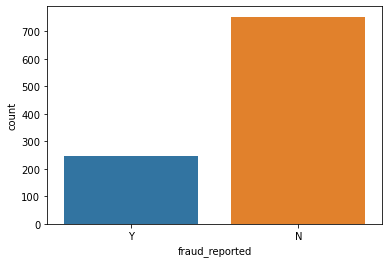

In [49]:
sns.countplot(df.fraud_reported) # counplot for target variable

In [50]:
# As we can see, fraud_reported column is having unbalanced recored
# need to apply up sample (SMOTE) technique to the dataset for good model building

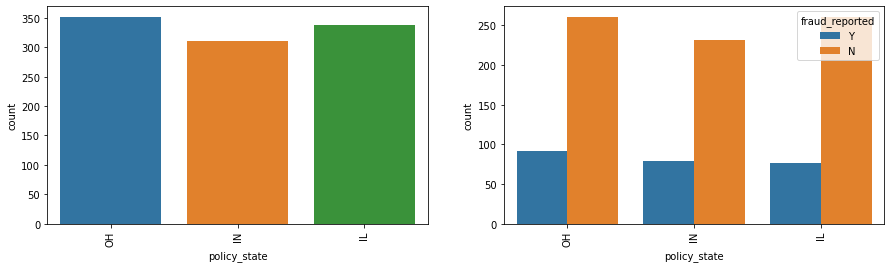

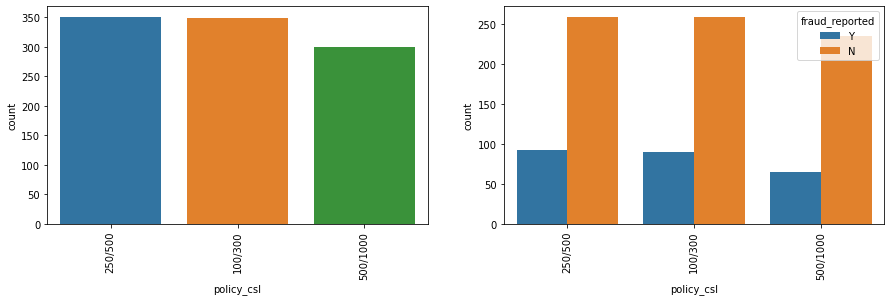

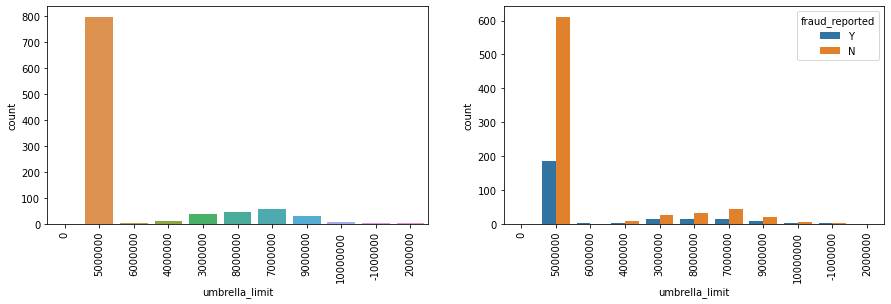

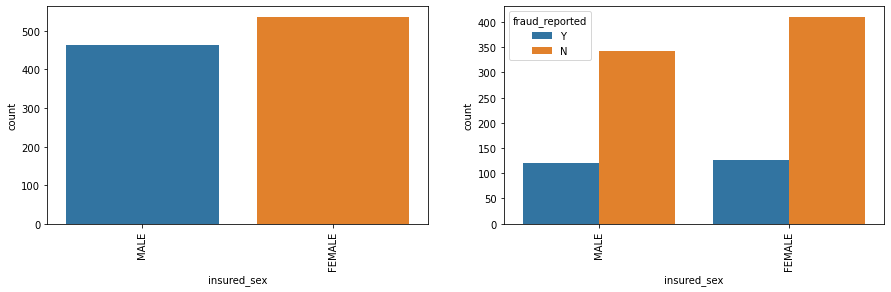

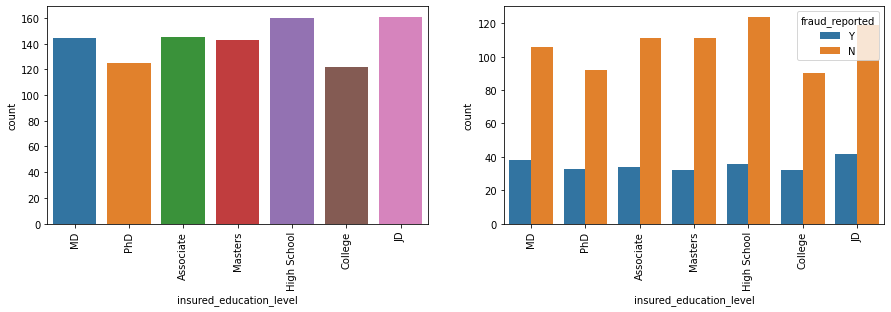

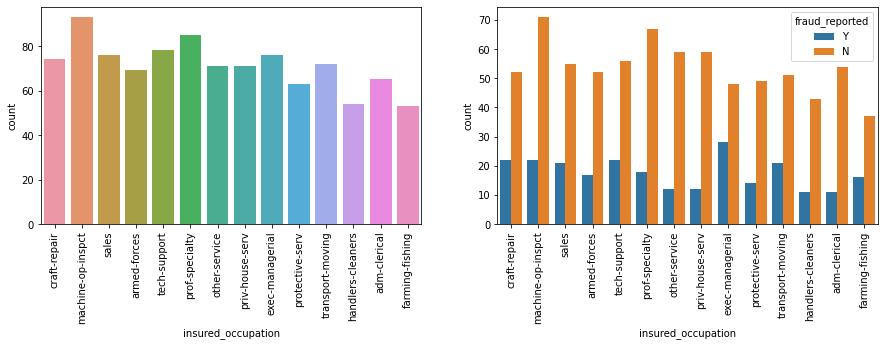

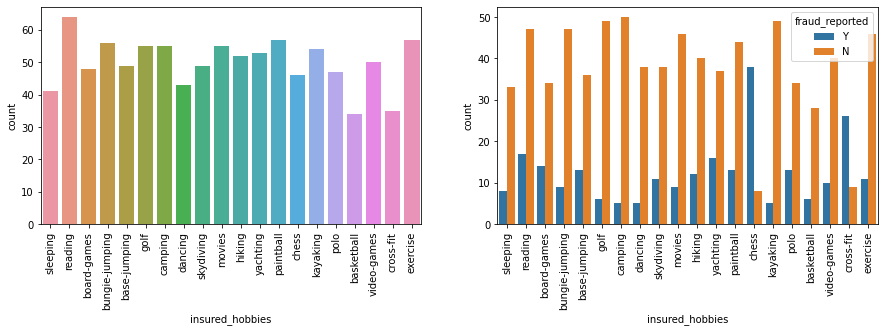

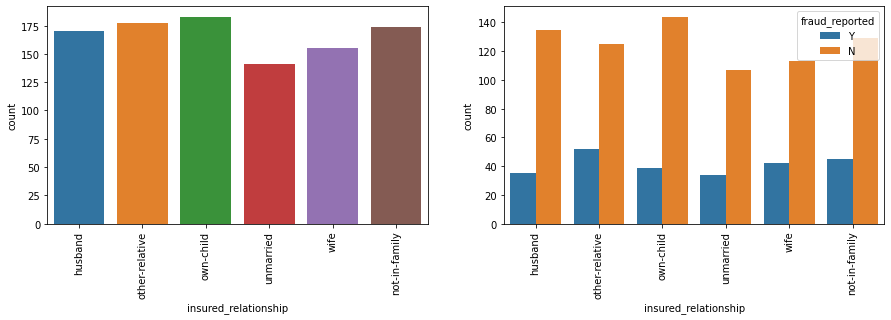

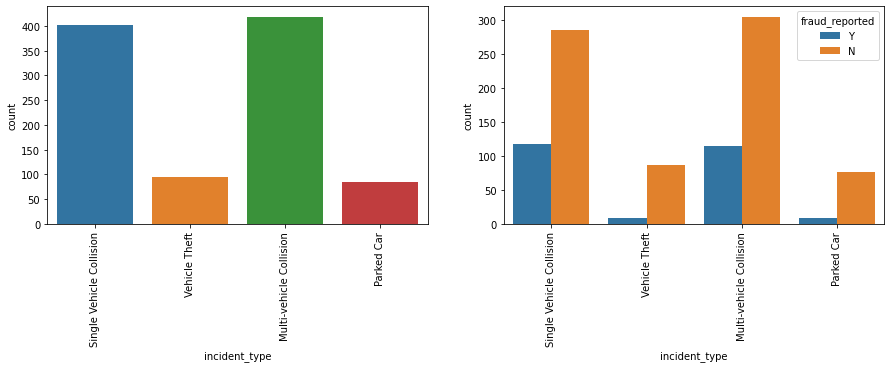

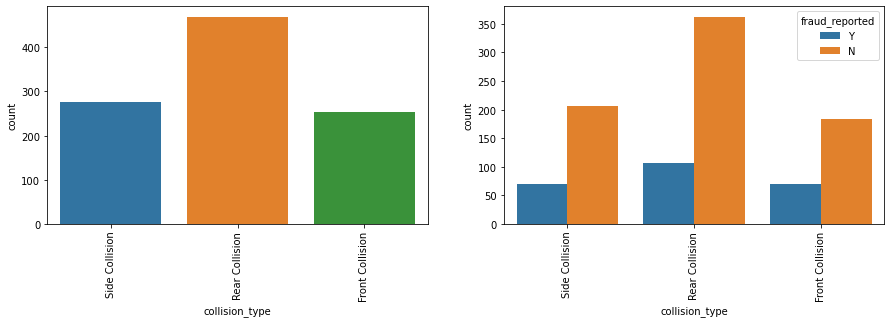

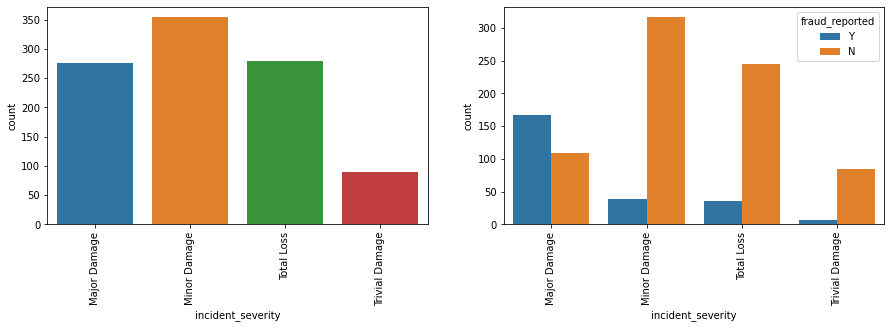

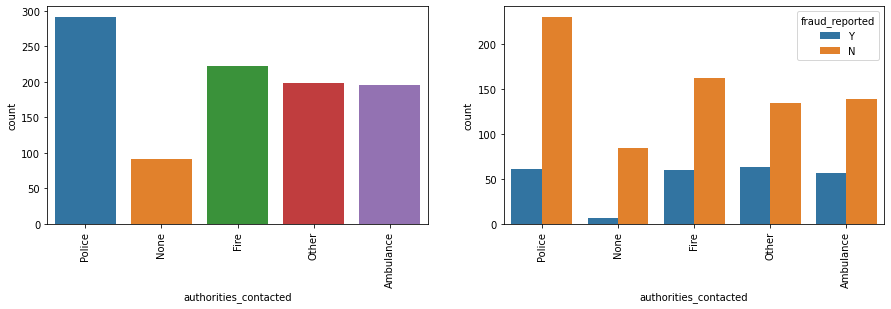

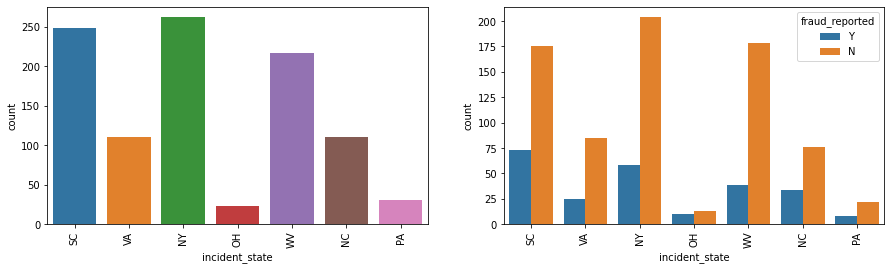

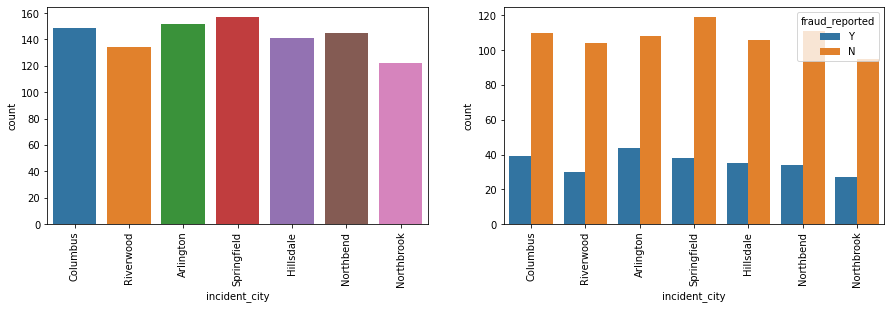

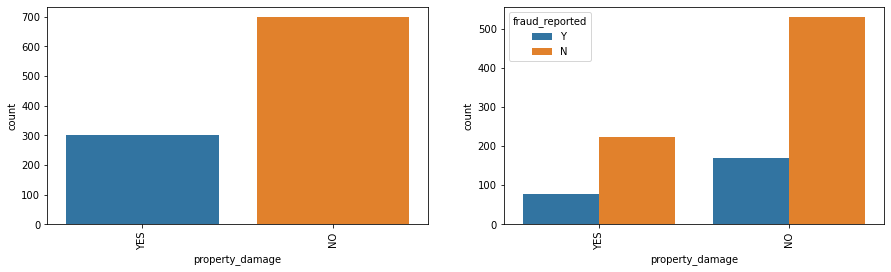

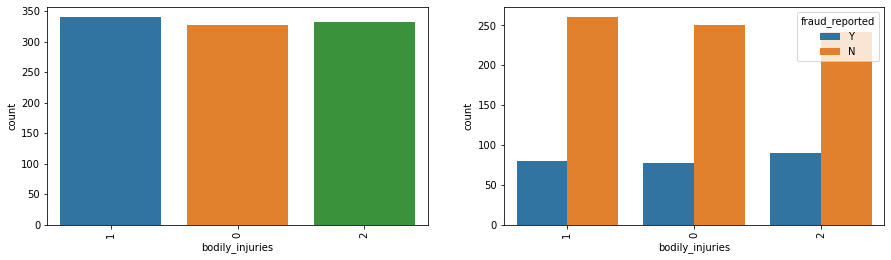

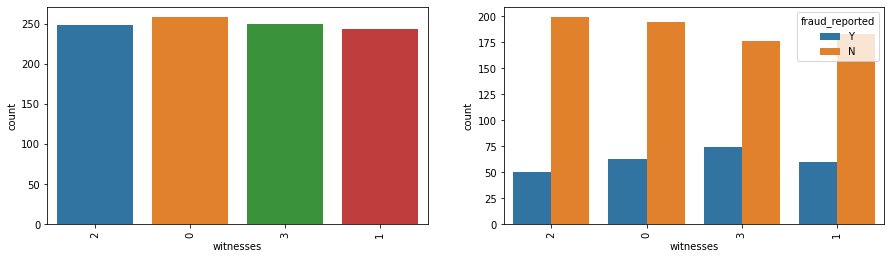

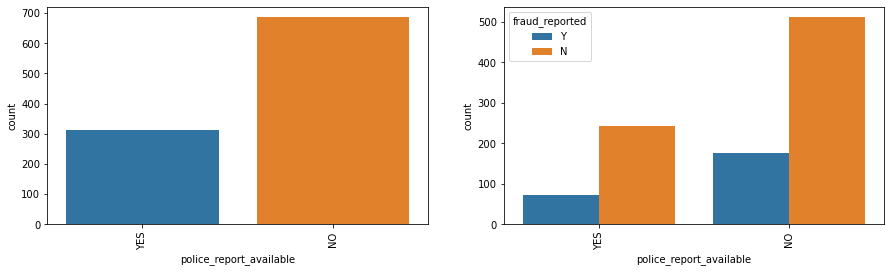

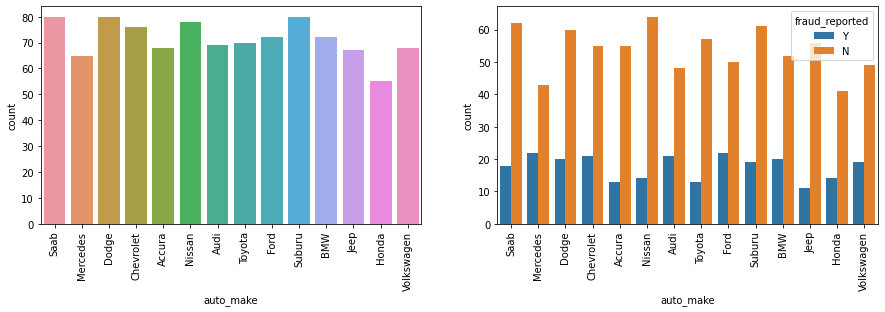

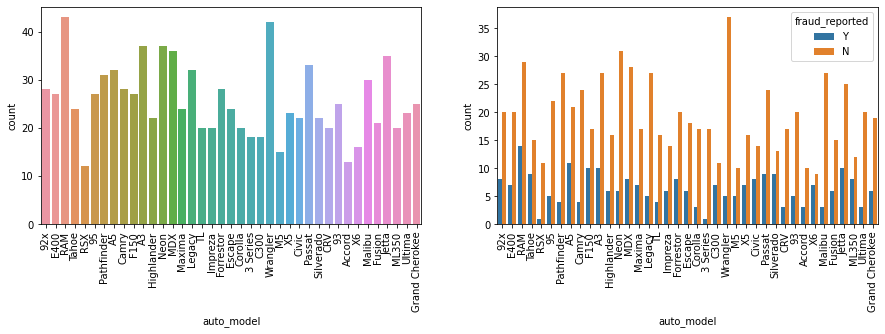

In [51]:
for i in object_col[:-1]:    
    plt.figure(figsize= (15, 4))
    l = list(df[i].unique())
    plt.subplot(1,2, 1)
    bar = sns.countplot(df[i])
    bar.set_xticklabels(labels = l, rotation = 90)

    plt.subplot(1,2, 2)
    bar1 = sns.countplot(df[i], hue = df['fraud_reported'])
    bar1.set_xticklabels(labels = l, rotation = 90)

    plt.show()

In [52]:
# Policy state
# we can see fraud_reported found in each policy state with almost same rate, mean fraud may be done from any of state need to 
# check properly in each state

# policy_csl
# In each policy_csl class is having same rate of fraud report

# umbrella_limit
# maxium customer is having umbrella_limit as 5000000 
# there is 50 % chances to get fraud case when umbrella_limit is 200000

# insured sex:
# As we found high rate of fraud in male is seems more as compare to Female, hence we can say female person application 
# having less probability to get fraud status

# insured_education_level
# maxium application are recieved from JD class but if we look to the fraud rate then we can say, high fraud rate we can see in the Phd and Colleage
# Doing person

# Insured_occupation
# maximum application received from machine-op-inspct occupation person, a
# maxium fraud rate found when person occupation is exce-managerial

# insured_hobbies
# Maximum application found fraud when person is having insured_hobbies as chess
# and least fraud rate found when person having hobbies as kayaking

# insured_relationship
# we can see, least fraud rate found when person is a husband

# incident_type:
# We can see, that, when case came for vehicle theft or parked car then it is having least chance to having fraud person 

# Collison_type
# As we have applied mode imputation on this column, hence we can say almost same fraud rate found in each collision_type case

# Incident_severity
# when application came for major Damage then need to check carefully, because maximum case of Major Damage found as fraud case

# Authorities_contracted
# when police authority _contrated found then there is least chance having fraud case as compare to rest classes


# incident_state
# high rate of fraud found when case came from OH state, need to deal these case with more careness 

# incident_city:
# High rate of fraud found in city of Arlington and least found in riverwood

# Property_damage
# when case is having property_damage as yes then there is high chance of getting fraud case as compare to case of property damage as No
# High application are recived from those who are having property_damage as NO

# police Report availabe
# maxium case are comming which are not having fraud reported 

# auto_make
# Almost every car is having same rate of getting fraud case


# Auto model
# we can see, when person is having wrangler model then chances are low to get fraud case

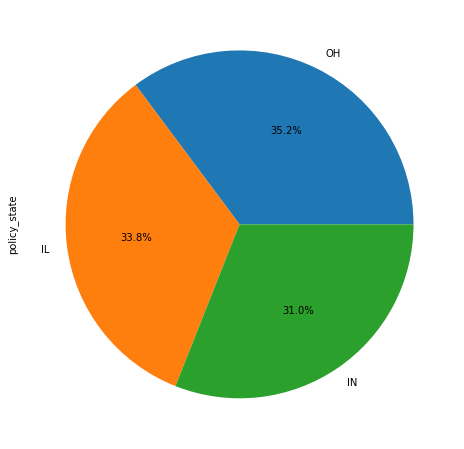

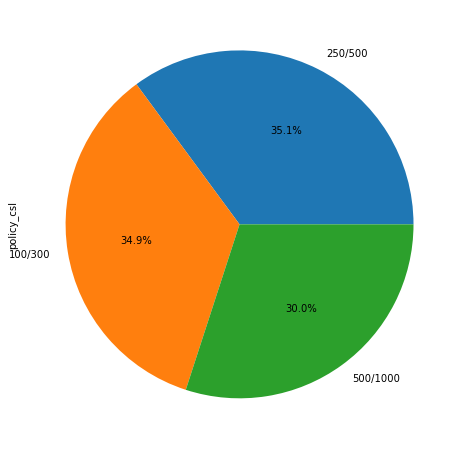

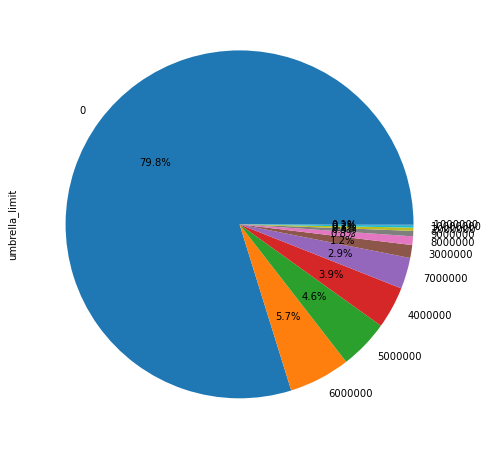

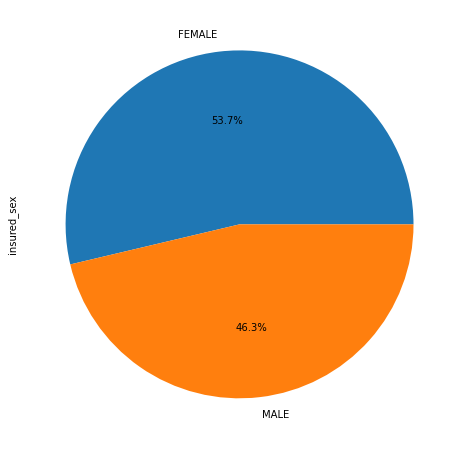

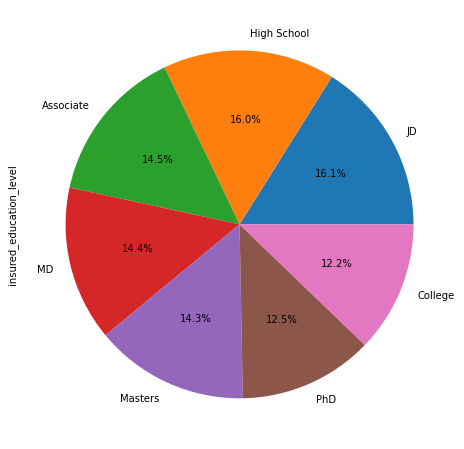

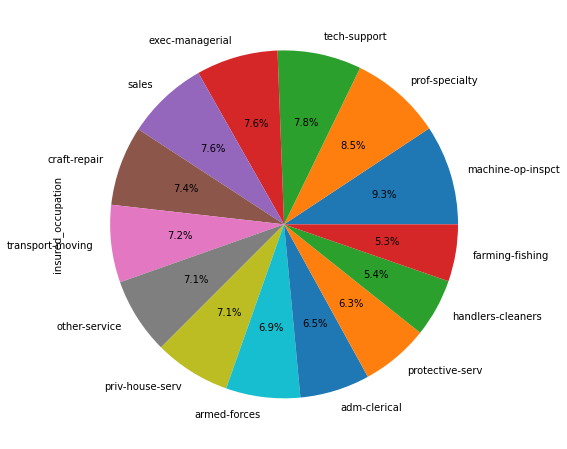

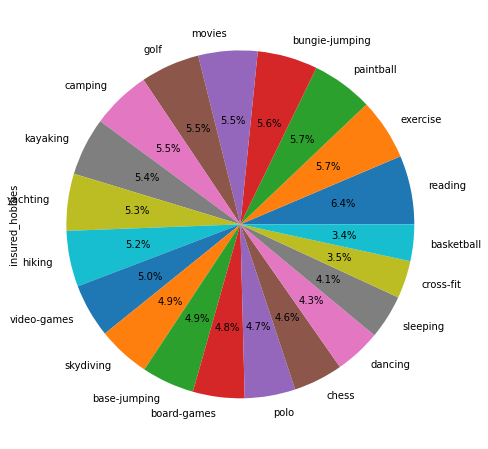

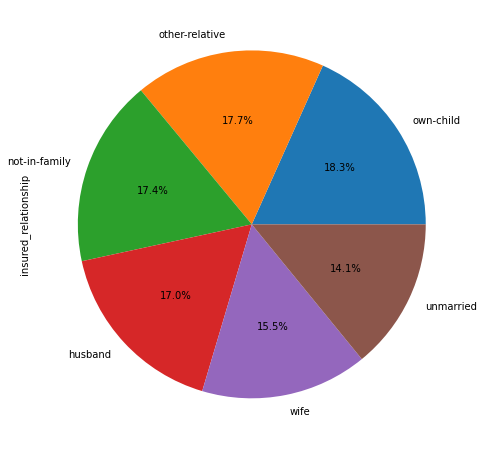

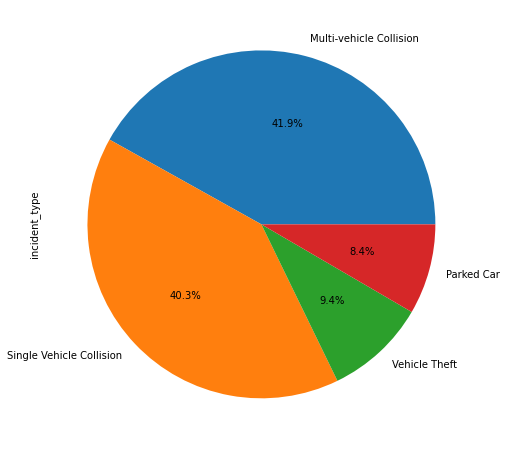

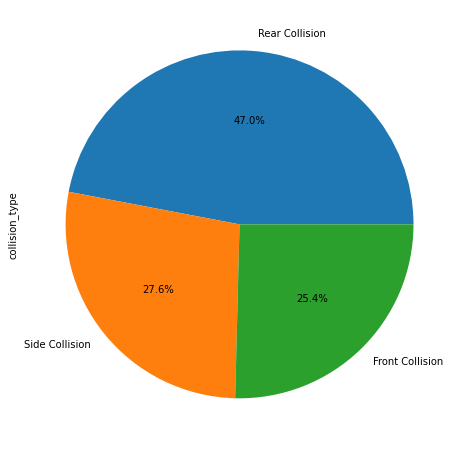

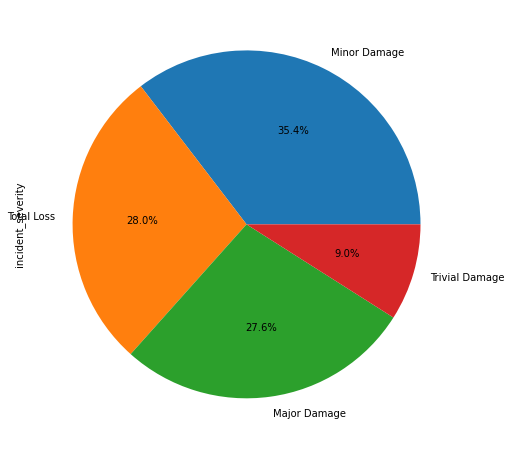

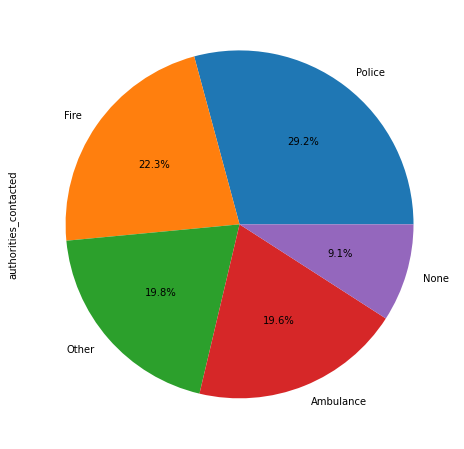

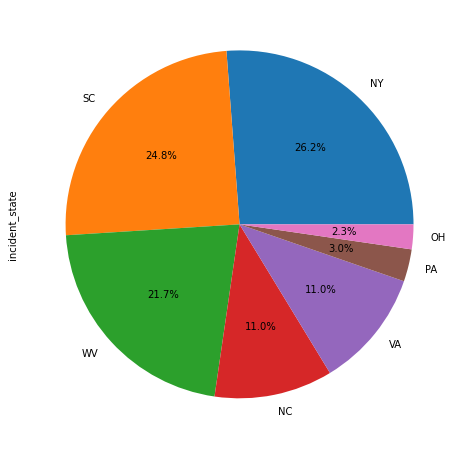

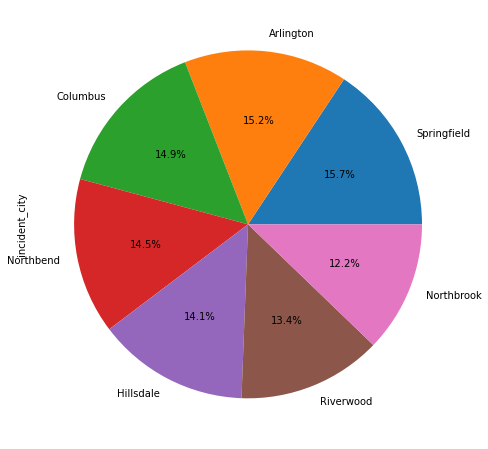

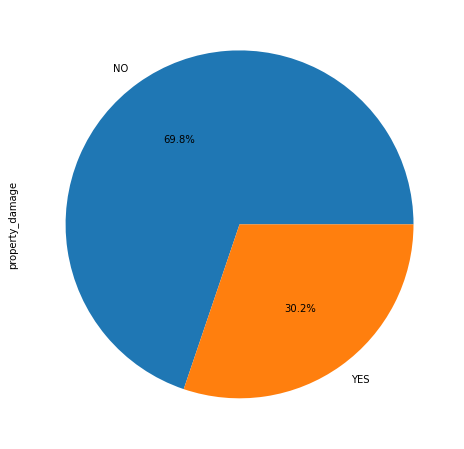

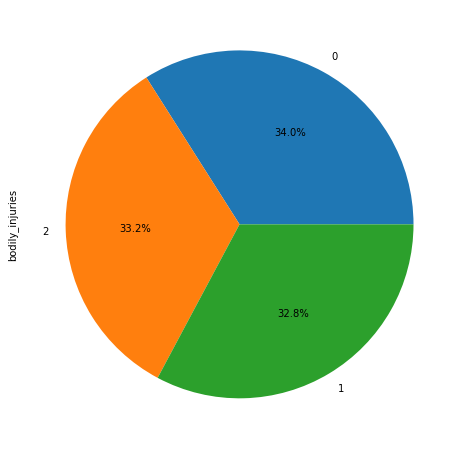

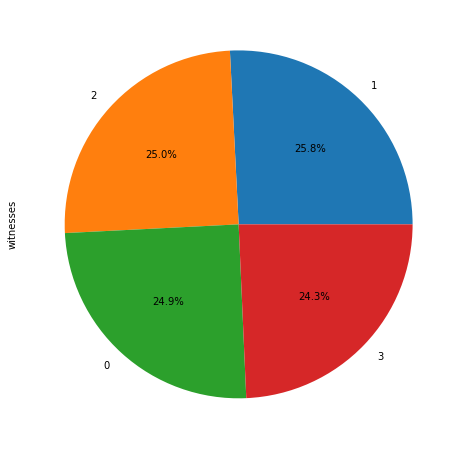

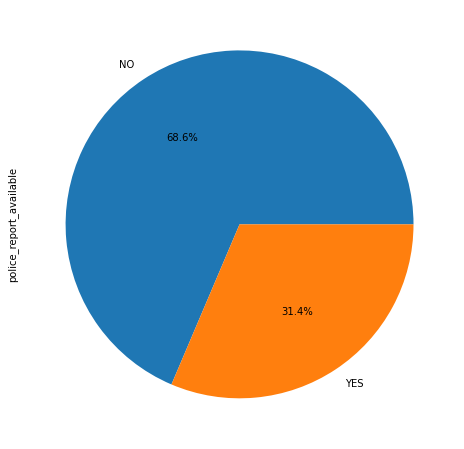

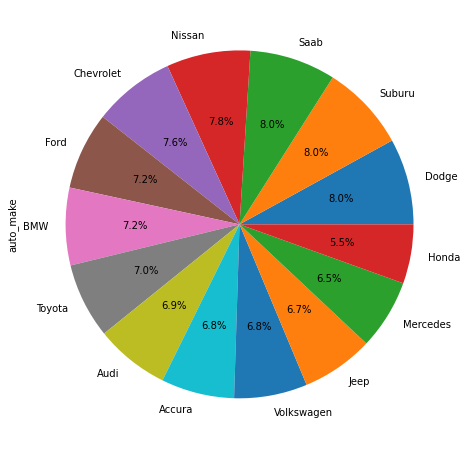

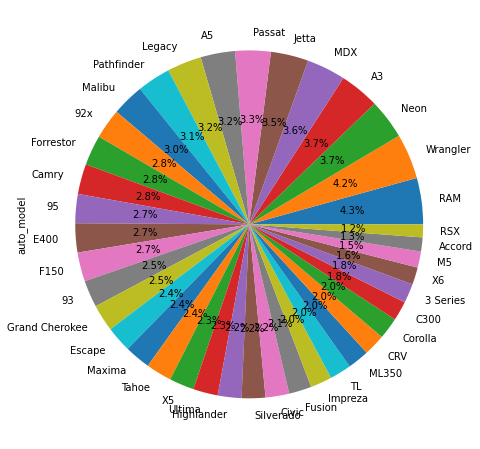

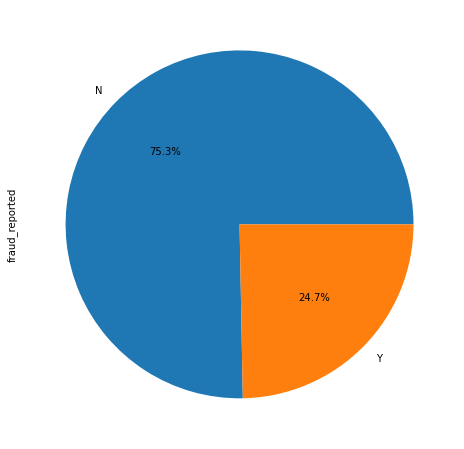

In [53]:
# We can see percentage of laon approval or rejection 
for i in object_col:
    plt.figure(figsize = (10, 8))
    df[i].value_counts().plot(kind = 'pie', autopct = '%.1f%%')


In [54]:
# percentage of value_counts of the object type columns
# policy_State column having approx same percentage of each class

# Incedent_type: maxium cases found of having single_vehicle collision or Multivihicle collison
# Incident_verity: least case found of having incident verity as Trivial damage 
# policy_csl is also having almost same percenatge of values in its column
# Maxium person is having umbrella_limit as 0
# Application of customer are receving from almost with same percentage of insured_Sex

# insured_education_level: almost same amount of application received from each class of education
# Transport_moving: is also having almost same percenatge of value count of each class

# colission tpype: rear collision case found with maxium record found of having collision of Rear

# In the incdient state:
# we can say least accident found in OH and PA state

# property damage :
# Maximum cases are found which are having highest percentage as NO

# police_report_available
# maximum case not having plice report 

# Fraud_reported:
# 25 % cases having fraud out status

In [55]:
object_col

# ['policy_state', 'policy_csl', 'umbrella_limit', 'insured_sex',
#        'insured_education_level', 'insured_occupation', 'insured_hobbies',
#        'insured_relationship', 'incident_type', 'collision_type',
#        'incident_severity', 'authorities_contacted', 'incident_state',
#        'incident_city', 'property_damage', 'bodily_injuries', 'witnesses',
#        'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']

Index(['policy_state', 'policy_csl', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'auto_make', 'auto_model', 'fraud_reported'],
      dtype='object')

### Checking Ouliers

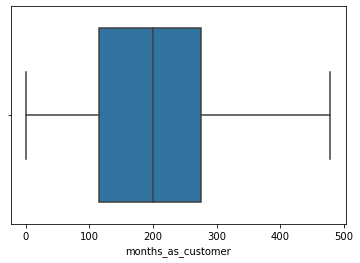

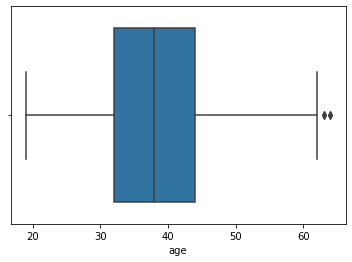

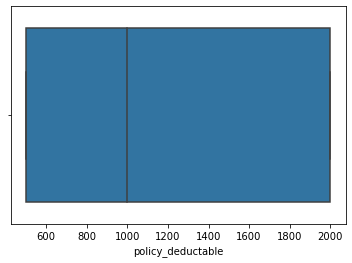

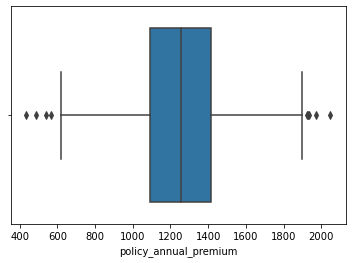

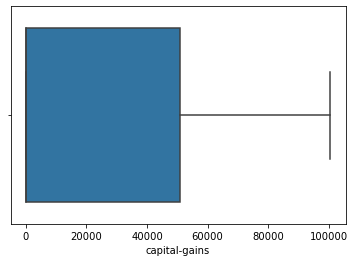

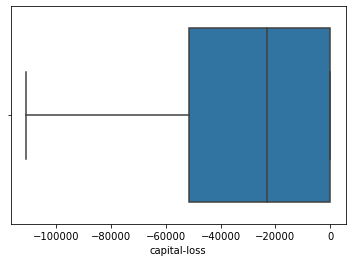

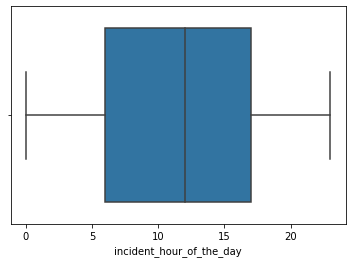

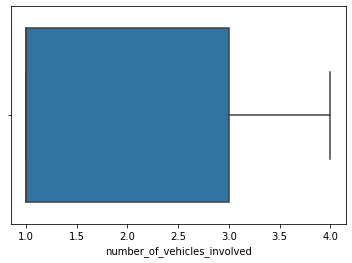

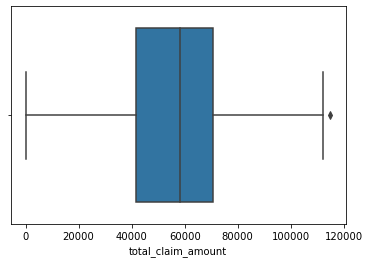

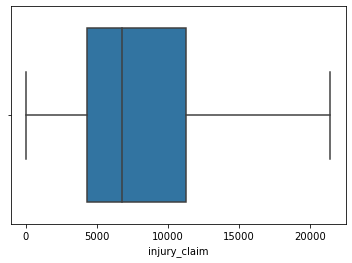

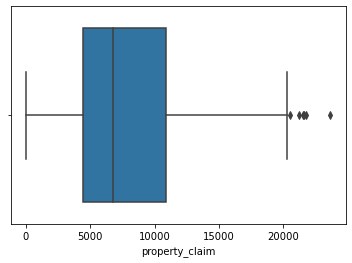

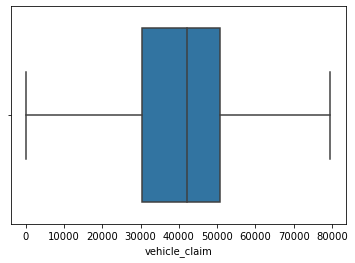

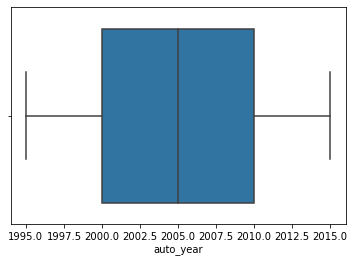

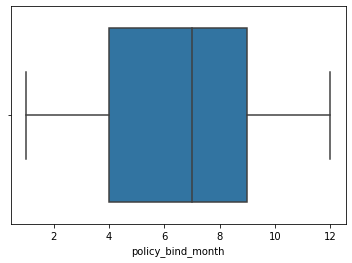

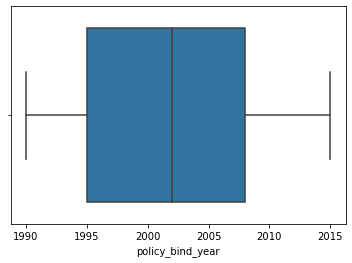

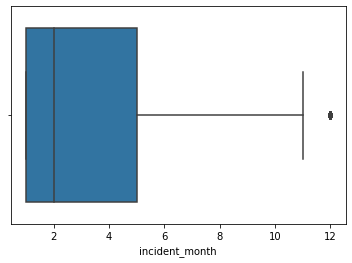

In [56]:
for i in num_col:
    plt.figure()
    sns.boxplot(df[i])

In [57]:
# Age column having very less outliers
# policy_annual_premium column is also having outliers
# total claim_amount is also having some outliers
# property_claim is also having some outliers
# incident_month column is also having some outliers
# Need to work for removing outliers

### Check skewness of numeric columns

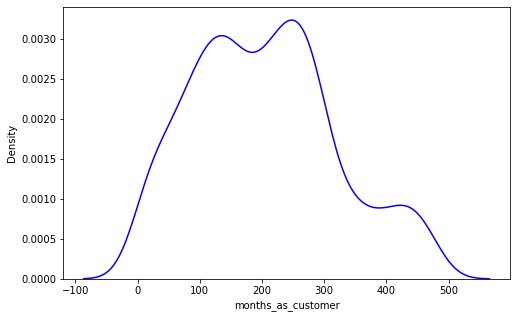

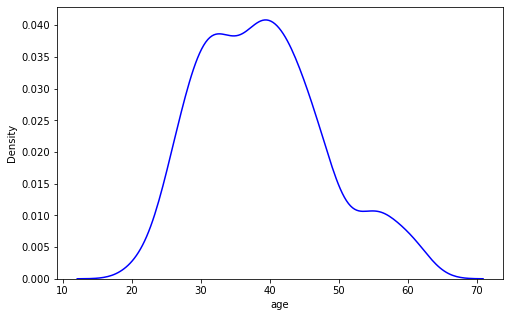

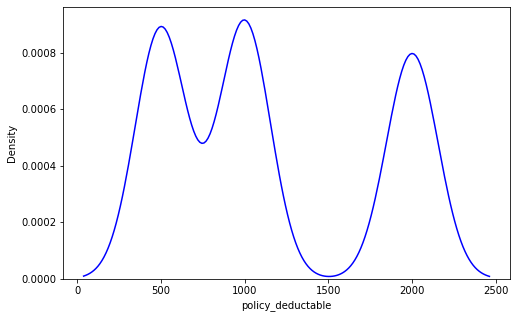

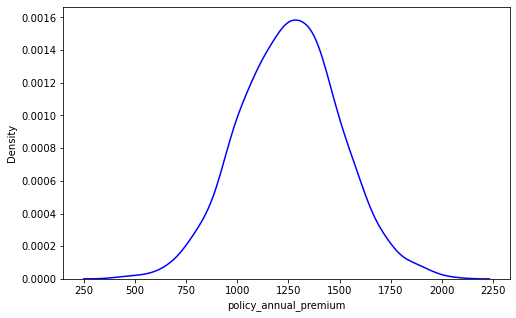

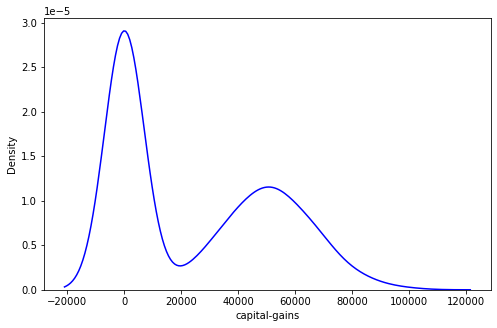

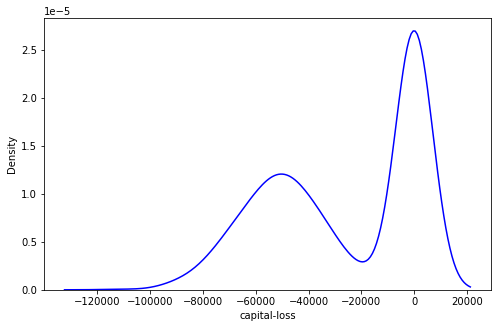

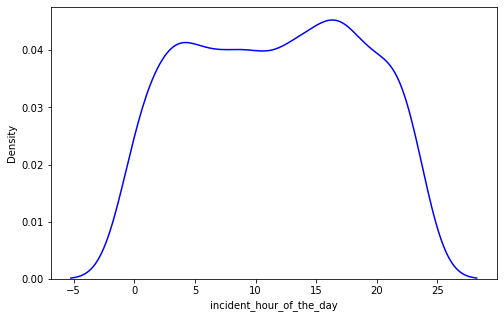

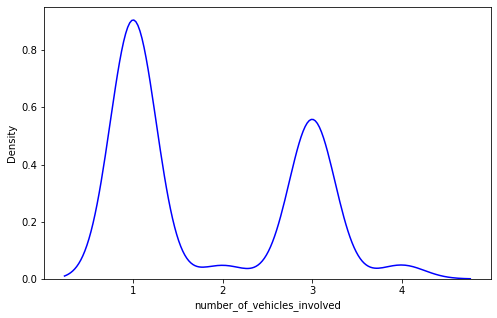

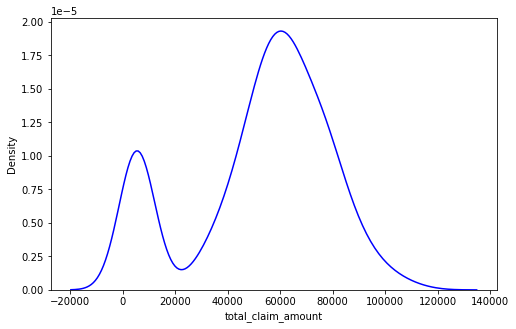

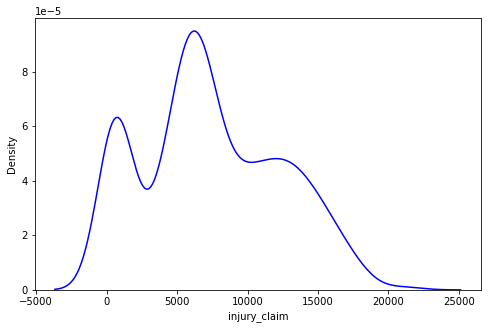

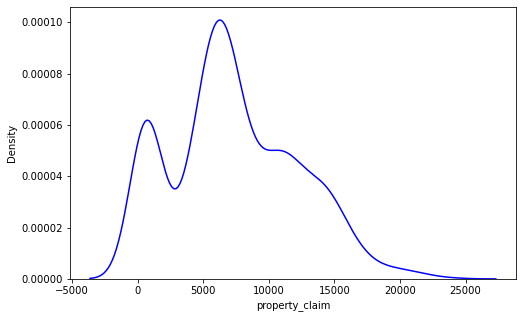

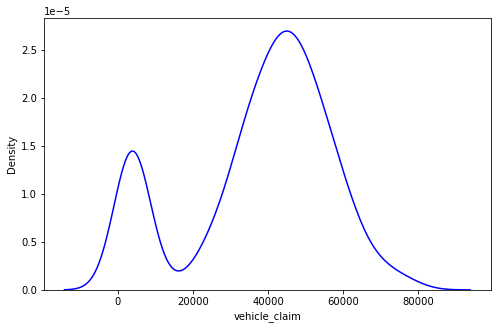

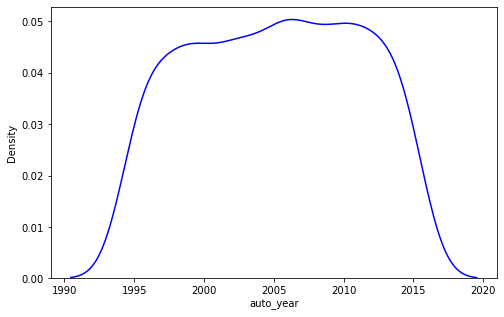

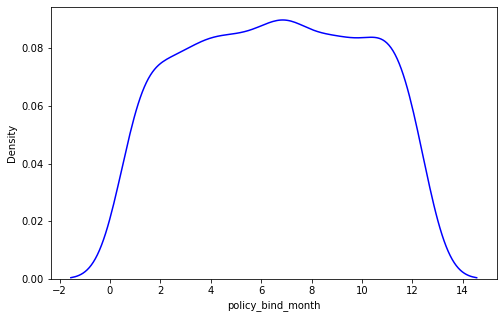

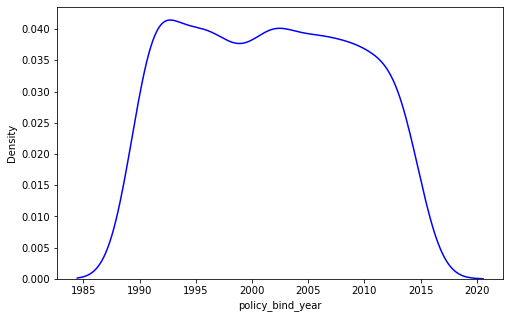

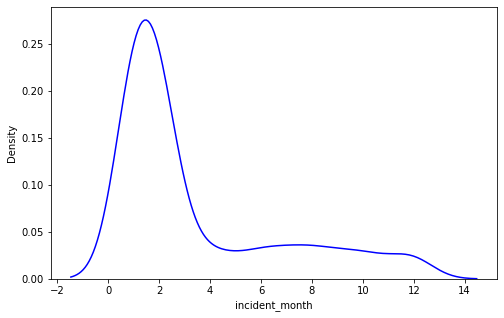

In [58]:
for i in num_col:
    plt.figure(figsize = (8,5))
    sns.distplot(df[i], color = 'b', hist = False)

In [59]:
# months_as_customer column is little bit right skewed
# age column is also little right skewed
# policy_deductable column is also showing skewness
# policy_annual_premium column is almost normmally distributed column, having min value as 250 and maxium
# value 2250

# capital_gains column is having righ skewnness in the dataset
# capital_loss column is having left skewness
# Incident_hours_of_the_day colum is also seems normally distributed column
# right skewness present in 'number of vehicles_involved'

# total claim amount is also having left skewness
# injury_claim, vihicle claim and property claim is having same skewness 
# policy_bind_month and policy_bind_year column is toward normally distributed
# incident_month column is almost right skewed column

### Distribution of Columns

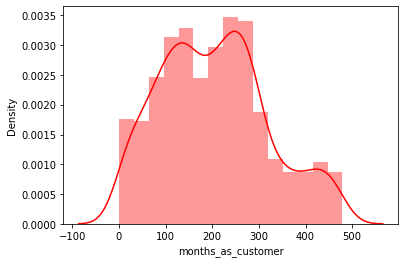

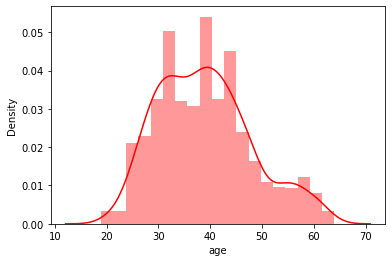

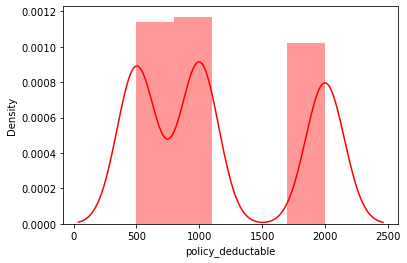

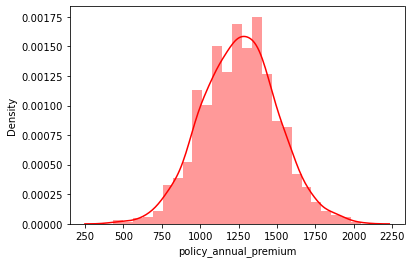

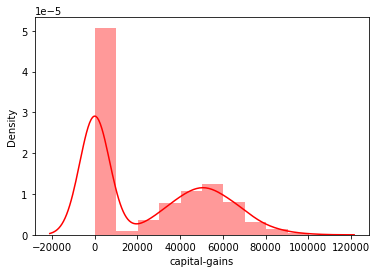

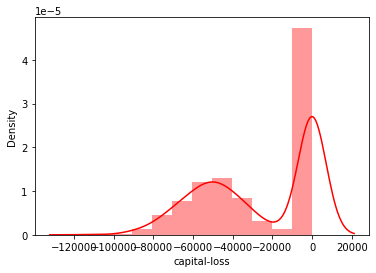

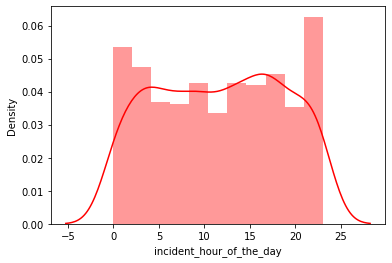

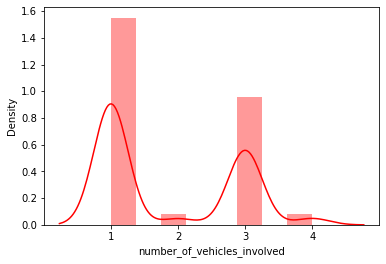

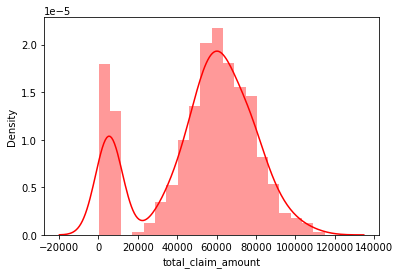

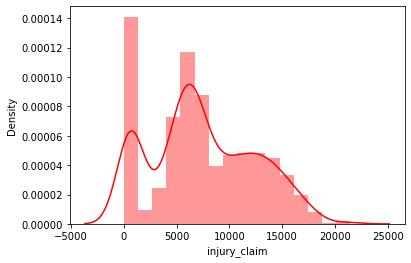

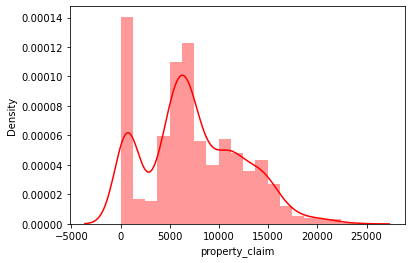

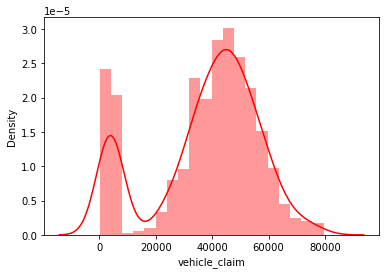

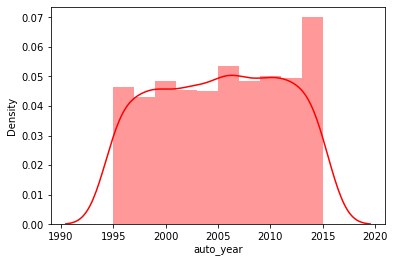

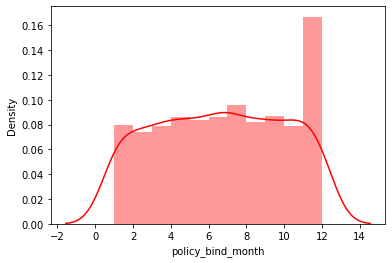

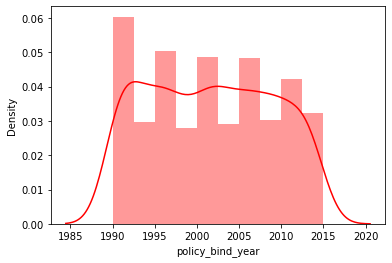

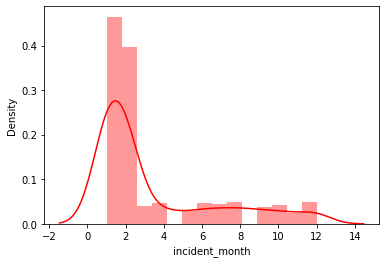

In [60]:
for i in num_col:
    plt.figure()
    sns.distplot(df[i], kde = True, color = 'r')

In [61]:
# As oberved at the time of skewness checking, found that above mentioned observation is also realted to
# this distributed, if we will work on skewness remove it will make column as normally distributed 

### Spread of Columns

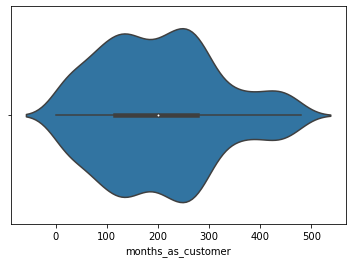

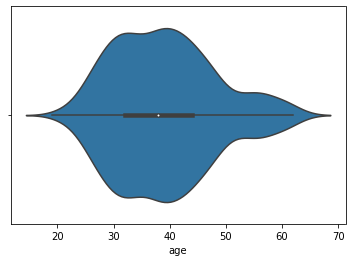

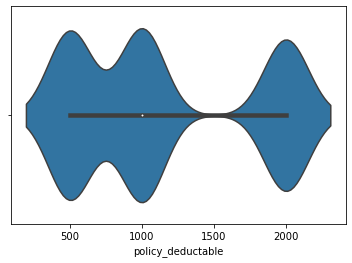

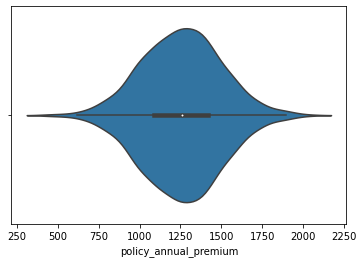

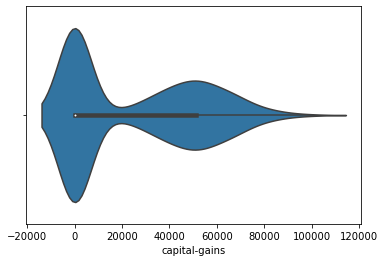

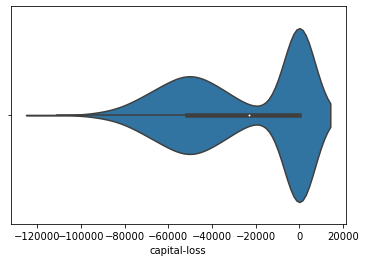

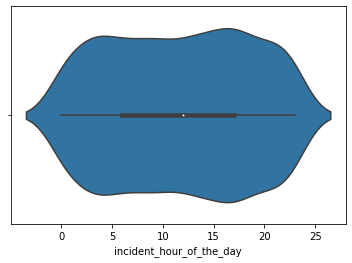

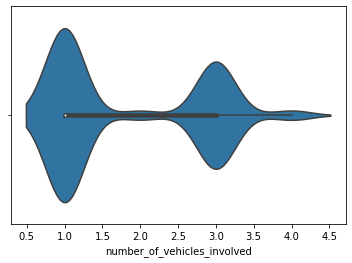

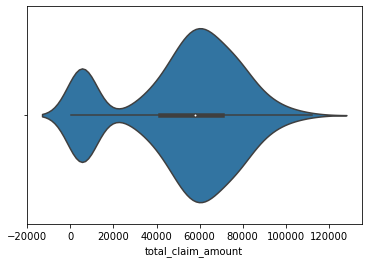

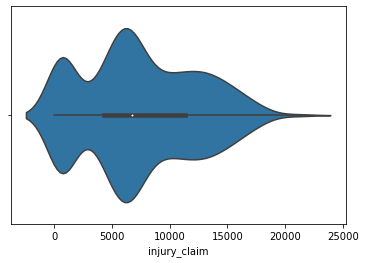

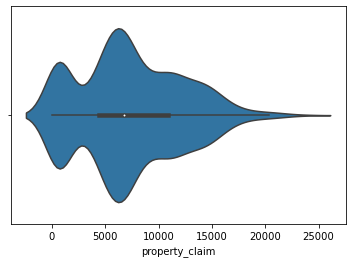

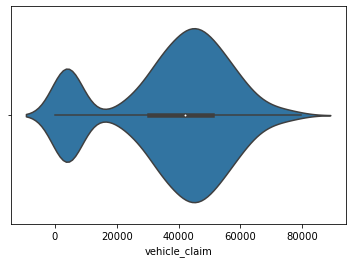

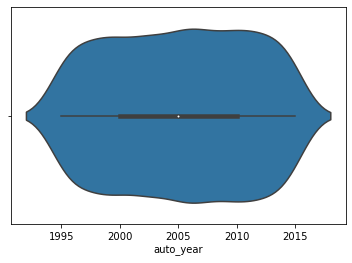

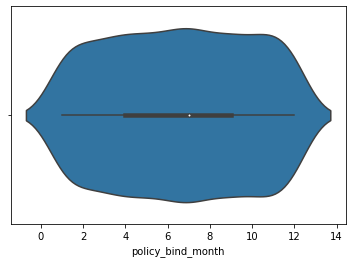

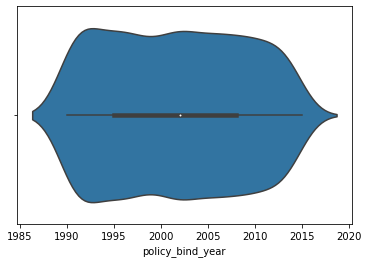

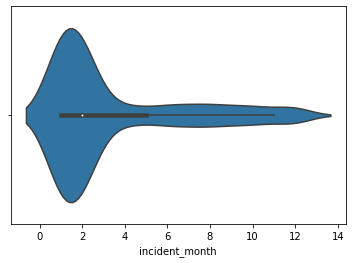

In [62]:
for i in num_col:    
    plt.figure()
    sns.violinplot(df[i], orient = 'vertical')

In [63]:
# Age column is well spreded, having less customer who are having age under the 55 to 65 age
# Less record are found for having policy_deductable in near to 1500
# policy_annual_premium column is also well spreaded
# in the capital gain column, we can se, we are having less record near 2000 capital gain
# capital loss is also negative for this column and maxium value are 0 (neigther gain nor loss)
# number of vihicle involved, very less case found where number of vichle is 2 or 4
# very less record we are having where total_claim_amount or vehicle_clain are near 20000
# maxium incident is occuring in the initial month of year, mostly in jan and Feb

In [64]:
df.head()

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   
1                 228   42           IN    250/500               2000   
2                 134   29           OH    100/300               2000   
3                 256   41           IL    250/500               2000   
4                 228   44           IL   500/1000               1000   

   policy_annual_premium umbrella_limit insured_sex insured_education_level  \
0                1406.91              0        MALE                      MD   
1                1197.22        5000000        MALE                      MD   
2                1413.14        5000000      FEMALE                     PhD   
3                1415.74        6000000      FEMALE                     PhD   
4                1583.91        6000000        MALE               Associate   

  insured_occupation insured_hobbies insured_relationship  capital-gains  \
0       craft-repair        sleeping              husband          53300   
1  machine-op-inspct         reading       other-relative              0   
2              sales     board-games            own-child          35100   
3       armed-forces     board-games            unmarried          48900   
4              sales     board-games            unmarried          66000   

   capital-loss             incident_type   collision_type incident_severity  \
0             0  Single Vehicle Collision   Side Collision      Major Damage   
1             0             Vehicle Theft   Rear Collision      Minor Damage   
2             0   Multi-vehicle Collision   Rear Collision      Minor Damage   
3        -62400  Single Vehicle Collision  Front Collision      Major Damage   
4        -46000             Vehicle Theft   Rear Collision      Minor Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   
1                Police             VA     Riverwood   
2                Police             NY      Columbus   
3                Police             OH     Arlington   
4                  None             NY     Arlington   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1              NO   
2                         7                            3              NO   
3                         5                            1              NO   
4                        20                            1              NO   

  bodily_injuries witnesses police_report_available  total_claim_amount  \
0               1         2                     YES               71610   
1               0         0                      NO                5070   
2               2         3                      NO               34650   
3               1         2                      NO               63400   
4               0         1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             650           4550     Accura        RSX   

   auto_year fraud_reported  policy_bind_month  policy_bind_year  \
0       2004              Y                 10              2014   
1       2007              Y                  6              2006   
2       2007              N                  6              2000   
3       2014              Y                  5              1990   
4       2009              N                  6              2014   

   incident_month  
0               1  
1               1  
2   

### Knowing the pattern of data

<AxesSubplot:xlabel='vehicle_claim', ylabel='total_claim_amount'>

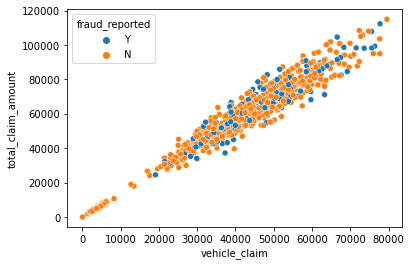

In [65]:
sns.scatterplot(df['vehicle_claim'], df['total_claim_amount'], hue = df['fraud_reported'])

# these columns are showing linear relation with each other

<AxesSubplot:xlabel='property_claim', ylabel='total_claim_amount'>

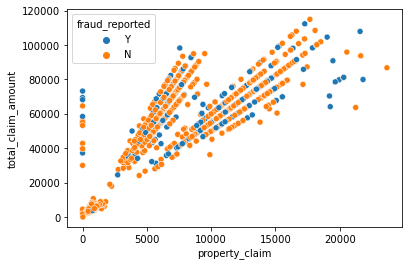

In [66]:
sns.scatterplot(df['property_claim'], df['total_claim_amount'], hue = df['fraud_reported'])
# these columns are showing linear relation with each other

<AxesSubplot:xlabel='age', ylabel='months_as_customer'>

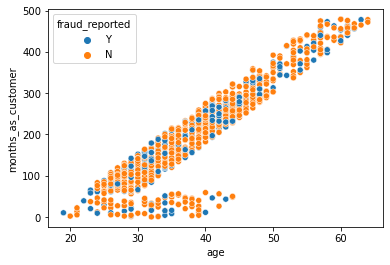

In [67]:
sns.scatterplot(df['age'], df['months_as_customer'], hue = df['fraud_reported'])
# these columns are showing linear relation with each other
# age and months_as_customer is showing linear relation which so general,
# as very less scatter points are present at the near age of 60, which mean older person is loyal

<AxesSubplot:xlabel='injury_claim', ylabel='total_claim_amount'>

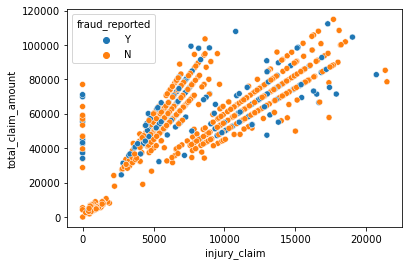

In [68]:
sns.scatterplot(df['injury_claim'], df['total_claim_amount'], hue = df['fraud_reported'])
# these columns are showing linear relation with each other

In [69]:
# No as such pattern found between other numeric cols 

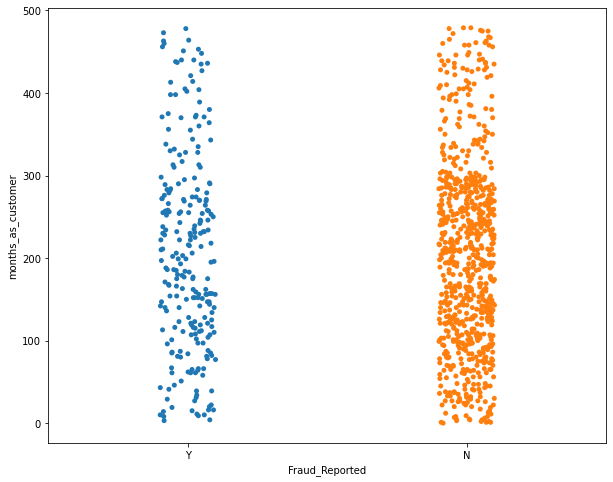

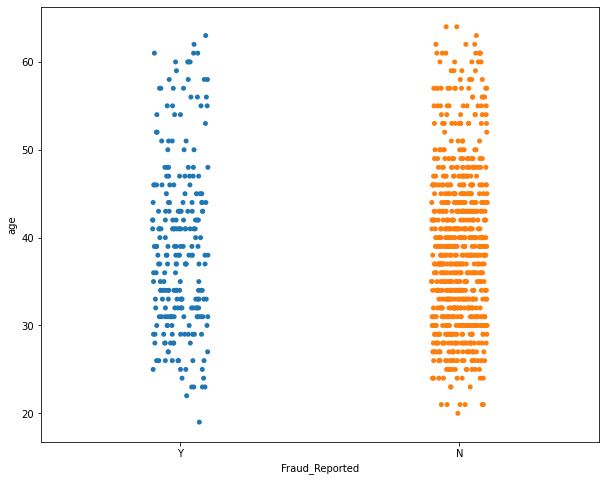

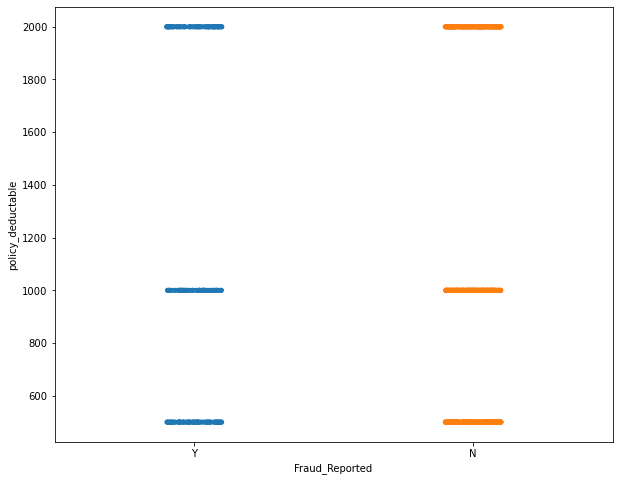

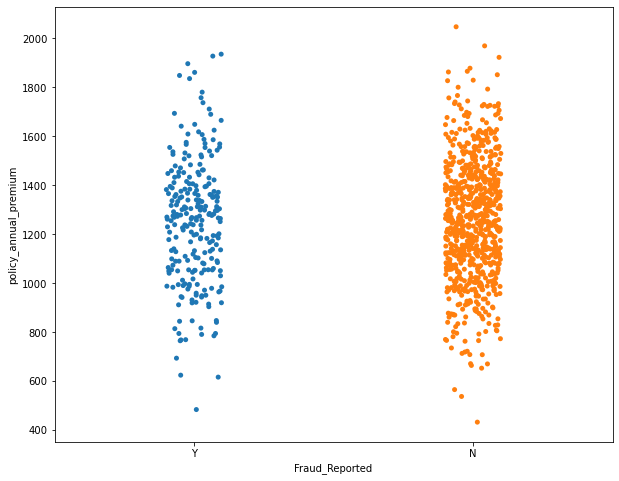

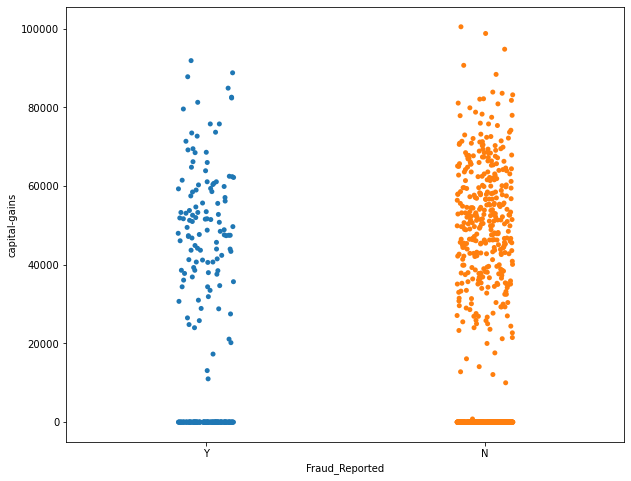

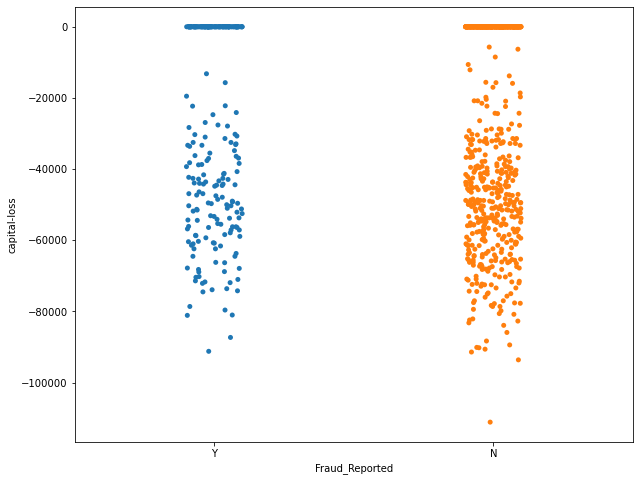

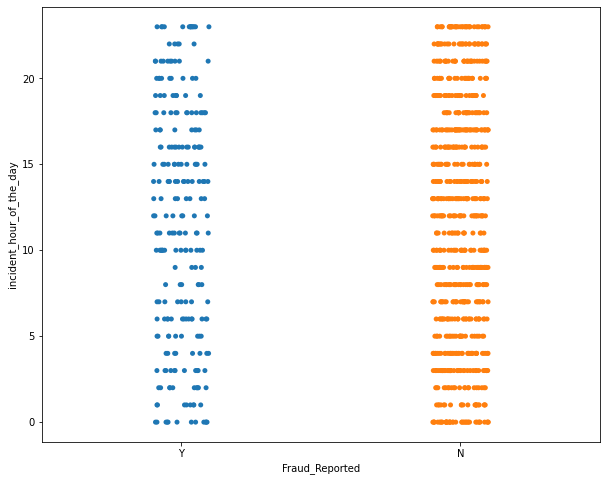

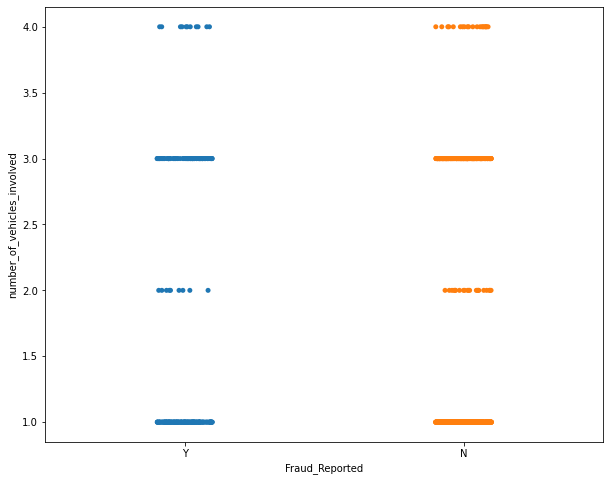

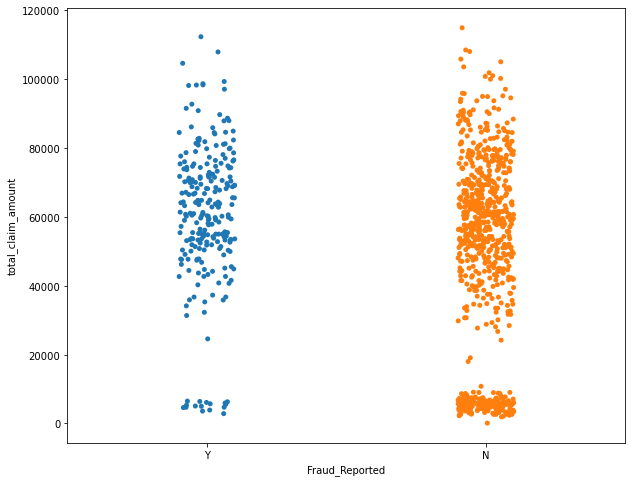

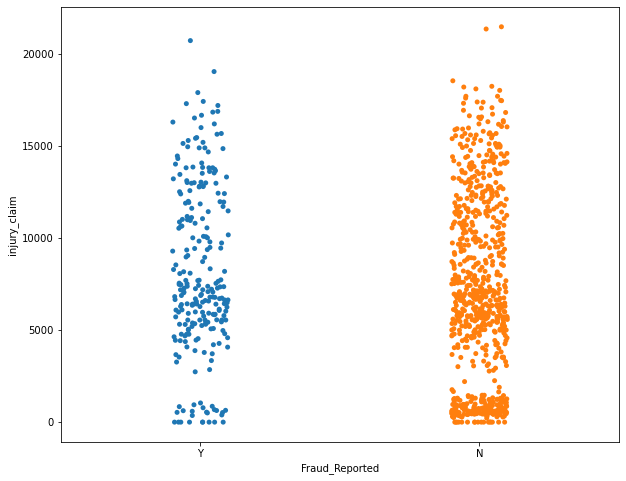

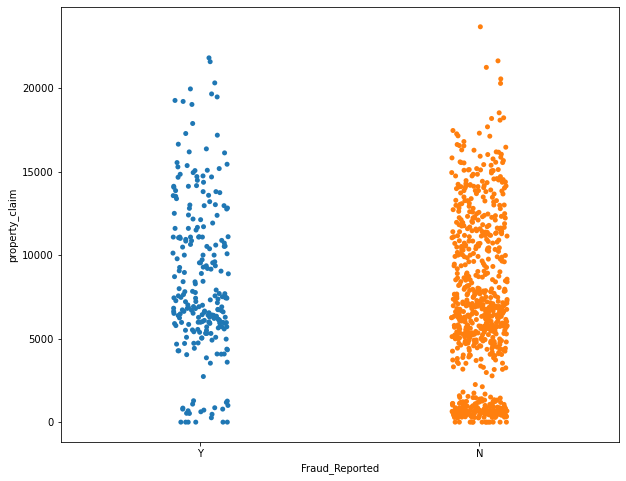

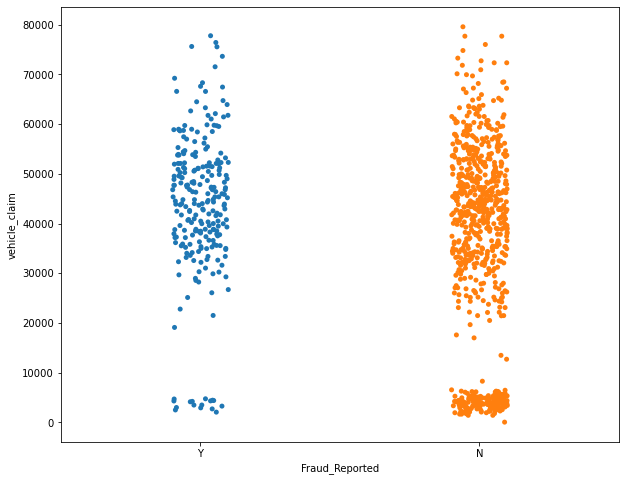

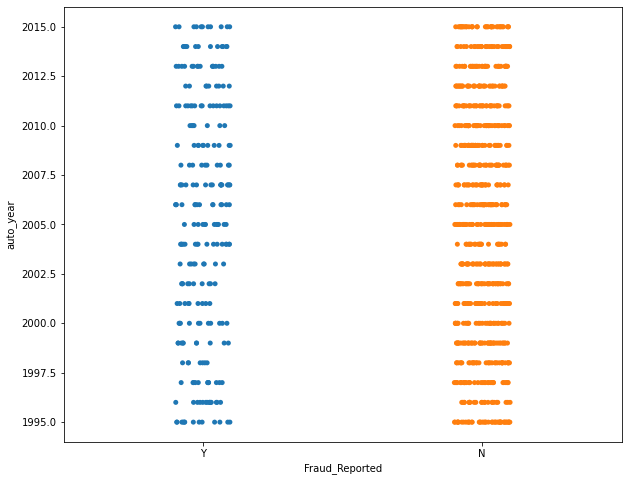

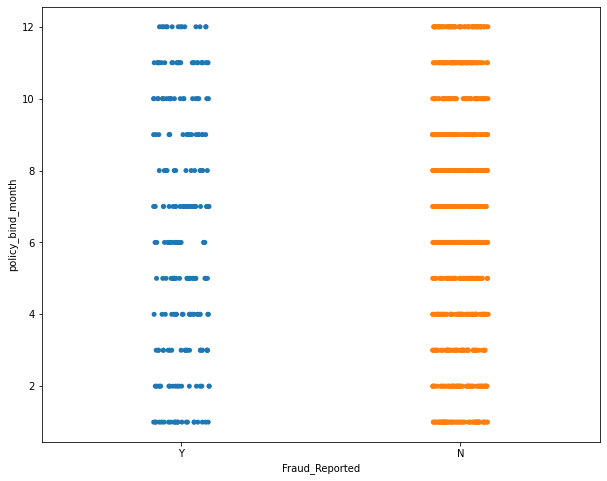

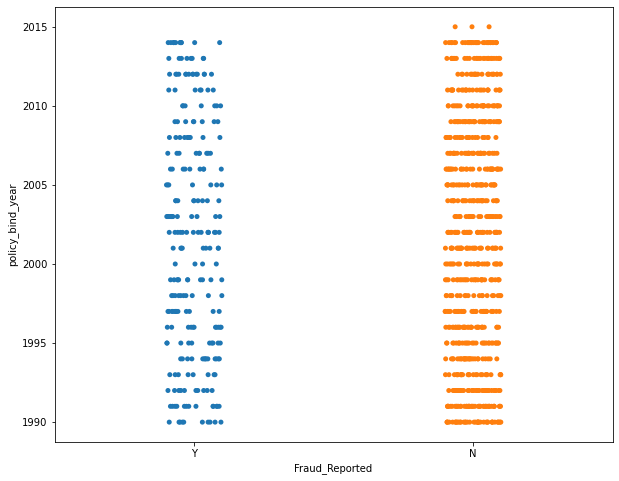

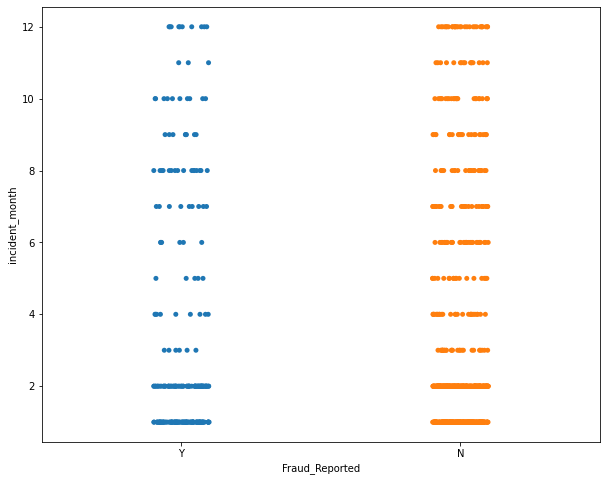

In [70]:
for i in num_col:                                       
    plt.figure(figsize = (10, 8))
    ax = sns.stripplot(df['fraud_reported'], df[i])
    ax.set(xlabel = 'Fraud_Reported', ylabel = i)

In [71]:
# visualisation of taget variable with numeric columns, we can easily find which range are showing
# high fraud percentage
# fraud is high when age is between 25 to 45 approx
# As the premium for policy_annual increase it is aslo leading to increase the fraud rate
# less chance found to getting a fraud case when claim amount is low in each type of claim

In [72]:
# for i in range(len(num_col)):

#     for j in num_col[i+1:]:    
#         plt.figure()
#         sns.lineplot(df[num_col[i]], df[j])

# This line of code taking so much therefore now, will create one by one line plot
num_col

# Index(['months_as_customer', 'age', 'policy_deductable',
#        'policy_annual_premium', 'capital-gains', 'capital-loss',
#        'incident_hour_of_the_day', 'number_of_vehicles_involved',
#        'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
#        'auto_year', 'policy_bind_month', 'policy_bind_year', 'incident_month'],
#       dtype='object')

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'policy_bind_month', 'policy_bind_year', 'incident_month'],
      dtype='object')

In [73]:
# high correlation found between followed below mentioned column
# age and months_as_customer
# injury_claim and total_claim_amount
# property_claim and total_claim_amount
# vehicle_claim and total_claim_amount

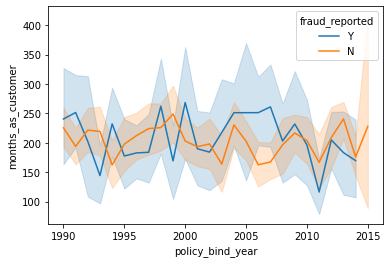

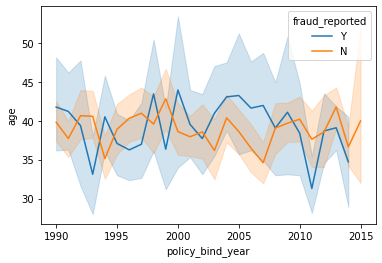

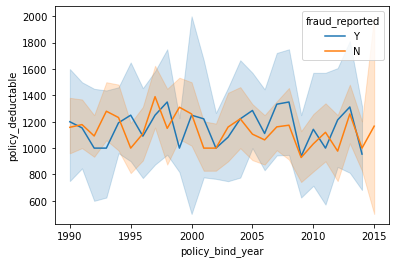

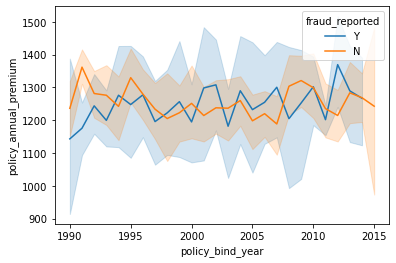

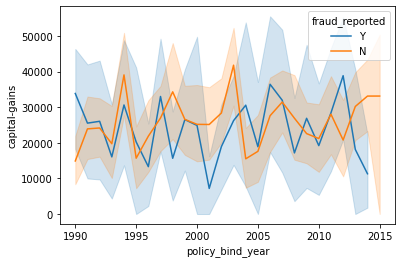

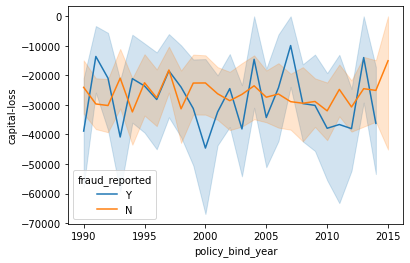

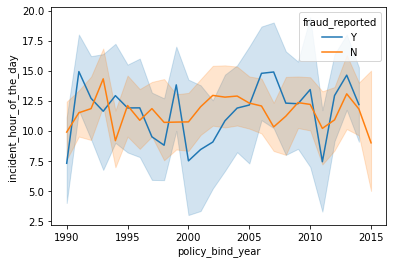

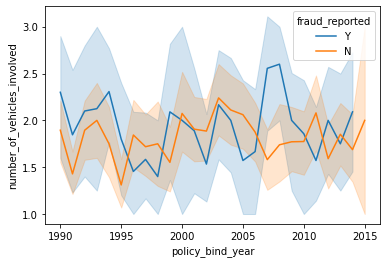

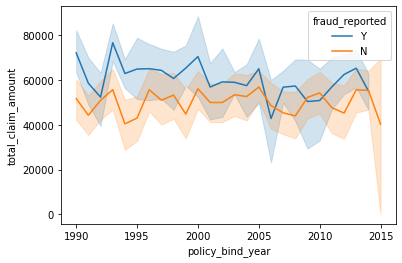

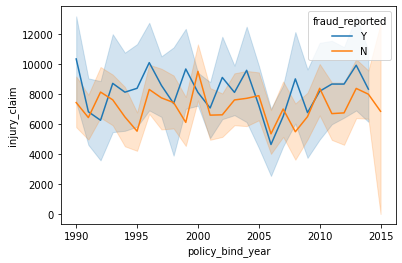

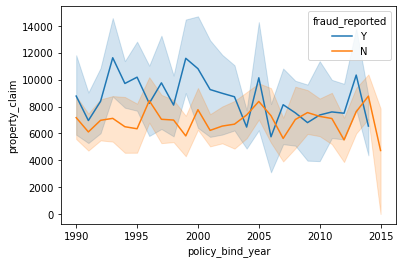

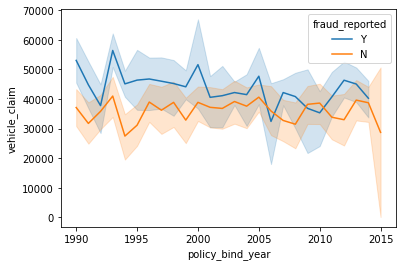

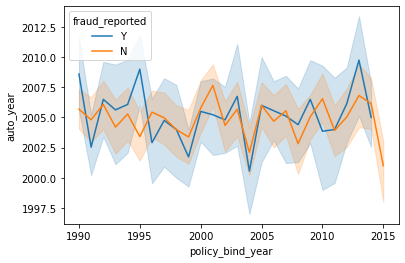

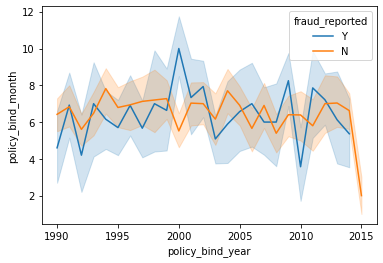

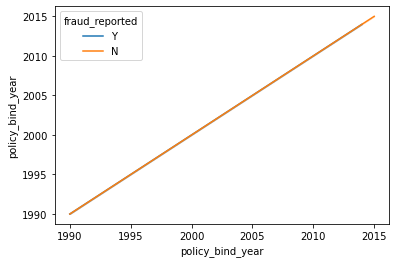

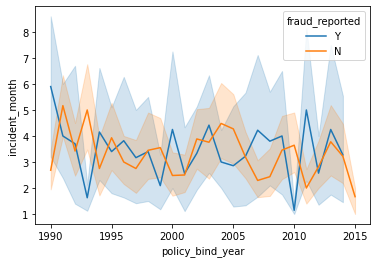

In [74]:

for i in num_col:
    plt.figure()
    sns.lineplot(x='policy_bind_year', y=i, hue='fraud_reported',data=df) 


In [75]:
# No as such lineplot found of numeric columns

### Correlation of the columns

In [76]:
df.corr()

months_as_customer       age  policy_deductable  \
months_as_customer                     1.000000  0.922098           0.026807   
age                                    0.922098  1.000000           0.029188   
policy_deductable                      0.026807  0.029188           1.000000   
policy_annual_premium                  0.005018  0.014404          -0.003245   
capital-gains                          0.006399 -0.007075           0.035212   
capital-loss                           0.020209  0.007368          -0.023544   
incident_hour_of_the_day               0.070639  0.087161           0.060935   
number_of_vehicles_involved            0.014736  0.022102           0.051214   
total_claim_amount                     0.062108  0.069863           0.022839   
injury_claim                           0.065329  0.075522           0.039107   
property_claim                         0.034940  0.060898           0.064792   
vehicle_claim                          0.061013  0.062588           0.005269   
auto_year                             -0.000292  0.001354           0.026105   
policy_bind_month                      0.005750  0.015501          -0.050416   
policy_bind_year                      -0.048276 -0.037444          -0.049598   
incident_month                         0.024659  0.023404          -0.006418   

                             policy_annual_premium  capital-gains  \
months_as_customer                        0.005018       0.006399   
age                                       0.014404      -0.007075   
policy_deductable                        -0.003245       0.035212   
policy_annual_premium                     1.000000      -0.013738   
capital-gains                            -0.013738       1.000000   
capital-loss                              0.023547      -0.046904   
incident_hour_of_the_day                 -0.001578      -0.016406   
number_of_vehicles_involved              -0.045991       0.061643   
total_claim_amount                        0.009094       0.015980   
injury_claim                             -0.017633       0.025934   
property_claim                           -0.011654      -0.000779   
vehicle_claim                             0.020246       0.015836   
auto_year                                -0.049226       0.031398   
policy_bind_month                        -0.035355      -0.011102   
policy_bind_year                          0.001249       0.041249   
incident_month                            0.021559       0.029409   

                             capital-loss  incident_hour_of_the_day  \
months_as_customer               0.020209                  0.070639   
age                              0.007368                  0.087161   
policy_deductable               -0.023544                  0.060935   
policy_annual_premium            0.023547                 -0.001578   
capital-gains                   -0.046904                 -0.016406   
capital-loss                     1.000000                 -0.025054   
incident_hour_of_the_day        -0.025054                  1.000000   
number_of_vehicles_involved     -0.014895                  0.120794   
total_claim_amount              -0.036060                  0.217702   
injury_claim                    -0.046060                  0.165768   
property_claim                  -0.022863                  0.179536   
vehicle_claim                   -0.032665                  0.215626   
auto_year                       -0.056615                  0.021368   
policy_bind_month                0.003436                 -0.000934   
policy_bind_year                -0.026420                  0.035412   
incident_month                   0.023216                  0.044827   

                             number_of_vehicles_involved  total_claim_amount  \
months_as_customer                              0.014736            0.062108   
age                                             0.022102            0.069863   
policy_deductable                             

<AxesSubplot:>

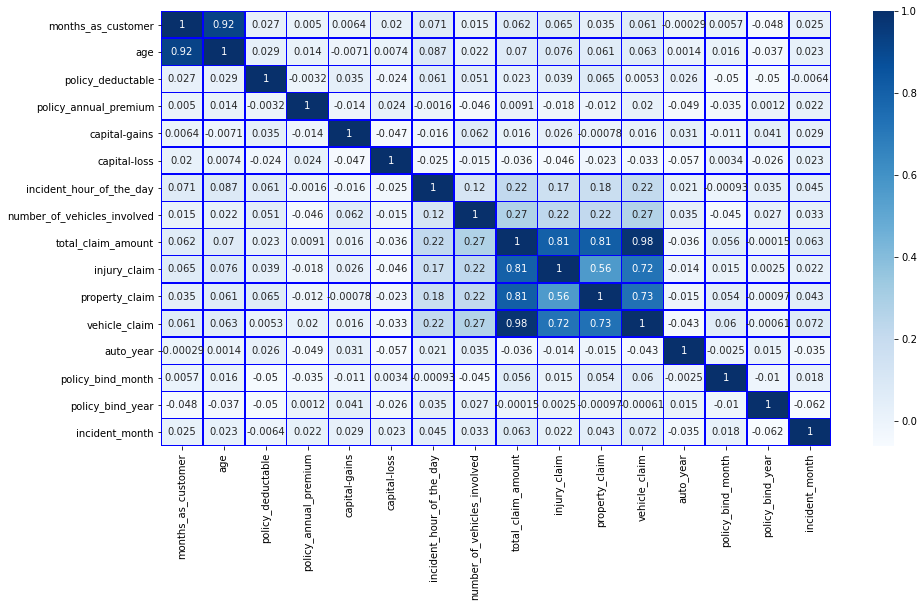

In [77]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues', linewidth = 0.5, linecolor = 'blue' )   # Heatmap with number, 

In [78]:
# high correlation found between followed below mentioned column
# age and months_as_customer
# injury_claim and total_claim_amount
# property_claim and total_claim_amount
# vehicle_claim and total_claim_amount

### Describe Data

In [79]:
df.describe()

months_as_customer          age  policy_deductable  \
count         1000.000000  1000.000000        1000.000000   
mean           203.954000    38.948000        1136.000000   
std            115.113174     9.140287         611.864673   
min              0.000000    19.000000         500.000000   
25%            115.750000    32.000000         500.000000   
50%            199.500000    38.000000        1000.000000   
75%            276.250000    44.000000        2000.000000   
max            479.000000    64.000000        2000.000000   

       policy_annual_premium  capital-gains   capital-loss  \
count            1000.000000    1000.000000    1000.000000   
mean             1256.406150   25126.100000  -26793.700000   
std               244.167395   27872.187708   28104.096686   
min               433.330000       0.000000 -111100.000000   
25%              1089.607500       0.000000  -51500.000000   
50%              1257.200000       0.000000  -23250.000000   
75%              1415.695000   51025.000000       0.000000   
max              2047.590000  100500.000000       0.000000   

       incident_hour_of_the_day  number_of_vehicles_involved  \
count               1000.000000                   1000.00000   
mean                  11.644000                      1.83900   
std                    6.951373                      1.01888   
min                    0.000000                      1.00000   
25%                    6.000000                      1.00000   
50%                   12.000000                      1.00000   
75%                   17.000000                      3.00000   
max                   23.000000                      4.00000   

       total_claim_amount  injury_claim  property_claim  vehicle_claim  \
count          1000.00000   1000.000000     1000.000000    1000.000000   
mean          52761.94000   7433.420000     7399.570000   37928.950000   
std           26401.53319   4880.951853     4824.726179   18886.252893   
min             100.00000      0.000000        0.000000      70.000000   
25%           41812.50000   4295.000000     4445.000000   30292.500000   
50%           58055.00000   6775.000000     6750.000000   42100.000000   
75%           70592.50000  11305.000000    10885.000000   50822.500000   
max          114920.00000  21450.000000    23670.000000   79560.000000   

         auto_year  policy_bind_month  policy_bind_year  incident_month  
count  1000.000000        1000.000000       1000.000000     1000.000000  
mean   2005.103000           6.559000       2001.604000        3.407000  
std       6.015861           3.391758          7.360391        3.276291  
min    1995.000000           1.000000       1990.000000        1.000000  
25%    2000.000000           4.000000       1995.000000        1.000000  
50%    2005.000000           7.000000       2002.000000        2.000000  
75%    2010.000000           9.000000       2008.000000        5.000000  
max    2015.000000          12.000000       2015.000000       12.000000

<AxesSubplot:>

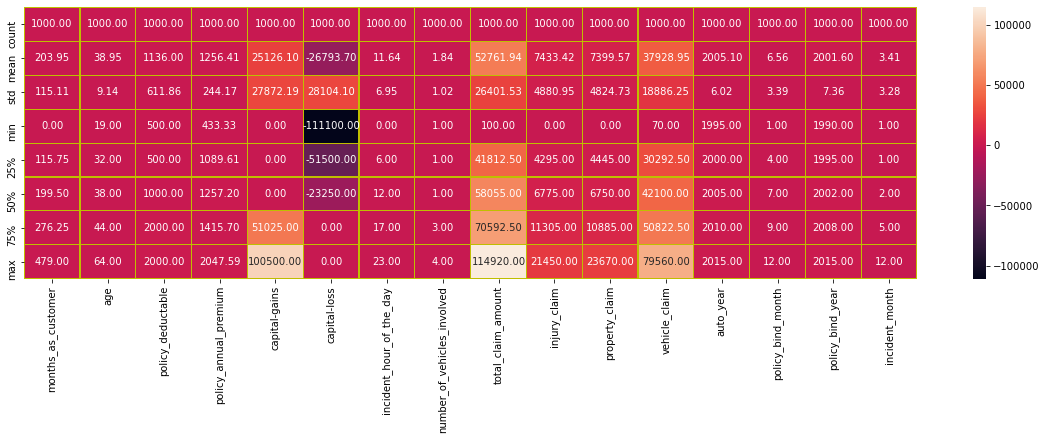

In [80]:
plt.figure(figsize = (20, 5))
sns.heatmap(df.describe(), annot = True, linewidth = 0.05, linecolor = 'y', fmt = "0.2f")

In [81]:
# policy_annual_premium, capital_loss, all types of claim column is showing high
# differnce between mean and 50 percentile
# Capital_gain column is having 0 min value and -26793 as highest value
# as above mentioned columns are showing high difference between mean and 50 percentile, these column are
# having high number of outlires

## Encoding

In [82]:
df.fraud_reported.value_counts()

# 0    753
# 1    247

N    753
Y    247
Name: fraud_reported, dtype: int64

In [83]:
from sklearn.preprocessing import LabelEncoder

#### Applying LabelEncoder to the Target Variable (fraud_reported)

In [84]:
le = LabelEncoder()

In [85]:
df['fraud_reported'] = le.fit_transform(df['fraud_reported'])  # Applying to the Label column

In [86]:
df.head(4)
# 1: Yes
# 0: No

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   
1                 228   42           IN    250/500               2000   
2                 134   29           OH    100/300               2000   
3                 256   41           IL    250/500               2000   

   policy_annual_premium umbrella_limit insured_sex insured_education_level  \
0                1406.91              0        MALE                      MD   
1                1197.22        5000000        MALE                      MD   
2                1413.14        5000000      FEMALE                     PhD   
3                1415.74        6000000      FEMALE                     PhD   

  insured_occupation insured_hobbies insured_relationship  capital-gains  \
0       craft-repair        sleeping              husband          53300   
1  machine-op-inspct         reading       other-relative              0   
2              sales     board-games            own-child          35100   
3       armed-forces     board-games            unmarried          48900   

   capital-loss             incident_type   collision_type incident_severity  \
0             0  Single Vehicle Collision   Side Collision      Major Damage   
1             0             Vehicle Theft   Rear Collision      Minor Damage   
2             0   Multi-vehicle Collision   Rear Collision      Minor Damage   
3        -62400  Single Vehicle Collision  Front Collision      Major Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   
1                Police             VA     Riverwood   
2                Police             NY      Columbus   
3                Police             OH     Arlington   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1              NO   
2                         7                            3              NO   
3                         5                            1              NO   

  bodily_injuries witnesses police_report_available  total_claim_amount  \
0               1         2                     YES               71610   
1               0         0                      NO                5070   
2               2         3                      NO               34650   
3               1         2                      NO               63400   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   

   auto_year  fraud_reported  policy_bind_month  policy_bind_year  \
0       2004               1                 10              2014   
1       2007               1                  6              2006   
2       2007               0                  6              2000   
3       2014               1                  5              1990   

   incident_month  
0               1  
1               1  
2               2  
3              10

In [87]:
df.fraud_reported.unique() 
# array([1, 0])

array([1, 0])

In [88]:
encoded_df = df.copy()   # copy of df dataset

#### Applying OneHotEncoding to other categorical columns

In [89]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [90]:
encoded_df.head(2)

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   
1                 228   42           IN    250/500               2000   

   policy_annual_premium umbrella_limit insured_sex insured_education_level  \
0                1406.91              0        MALE                      MD   
1                1197.22        5000000        MALE                      MD   

  insured_occupation insured_hobbies insured_relationship  capital-gains  \
0       craft-repair        sleeping              husband          53300   
1  machine-op-inspct         reading       other-relative              0   

   capital-loss             incident_type  collision_type incident_severity  \
0             0  Single Vehicle Collision  Side Collision      Major Damage   
1             0             Vehicle Theft  Rear Collision      Minor Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   
1                Police             VA     Riverwood   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1              NO   

  bodily_injuries witnesses police_report_available  total_claim_amount  \
0               1         2                     YES               71610   
1               0         0                      NO                5070   

   injury_claim  property_claim  vehicle_claim auto_make auto_model  \
0          6510           13020          52080      Saab        92x   
1           780             780           3510  Mercedes       E400   

   auto_year  fraud_reported  policy_bind_month  policy_bind_year  \
0       2004               1                 10              2014   
1       2007               1                  6              2006   

   incident_month  
0               1  
1               1

In [91]:
# auto+model column does't impact of wheather is case fraud or not
# we can extract these detail from auto maker company 
# therefore it is better to remove this column
encoded_df.drop(columns = 'auto_model', inplace = True)   
encoded_df.shape  
# (1000, 36)

(1000, 36)

In [92]:
object_col = ['policy_state', 'policy_csl', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'auto_make']

In [93]:
# value count of categorical columns
for i in object_col[:-1]:
    print( '------------------------------',i, ' column------------------------')
    print(encoded_df[i].value_counts())

------------------------------ policy_state  column------------------------
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
------------------------------ policy_csl  column------------------------
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
------------------------------ umbrella_limit  column------------------------
 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64
------------------------------ insured_sex  column------------------------
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
------------------------------ insured_education_level  column------------------------
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
---------

In [94]:
# Unique value of categorical columns
for i in object_col[:-1]:
    print(i,'column having ',encoded_df[i].nunique(),'values')

# policy_state column having  3 values
# policy_csl column having  3 values
# umbrella_limit column having  11 values
# insured_sex column having  2 values
# insured_education_level column having  7 values
# insured_occupation column having  14 values
# insured_hobbies column having  20 values
# insured_relationship column having  6 values
# incident_type column having  4 values
# collision_type column having  3 values
# incident_severity column having  4 values
# authorities_contacted column having  5 values
# incident_state column having  7 values
# incident_city column having  7 values
# property_damage column having  2 values
# bodily_injuries column having  3 values
# witnesses column having  4 values
# police_report_available column having  2 values
# auto_make column having  14 values

policy_state column having  3 values
policy_csl column having  3 values
umbrella_limit column having  11 values
insured_sex column having  2 values
insured_education_level column having  7 values
insured_occupation column having  14 values
insured_hobbies column having  20 values
insured_relationship column having  6 values
incident_type column having  4 values
collision_type column having  3 values
incident_severity column having  4 values
authorities_contacted column having  5 values
incident_state column having  7 values
incident_city column having  7 values
property_damage column having  2 values
bodily_injuries column having  3 values
witnesses column having  4 values
police_report_available column having  2 values


In [95]:
encoded_df1 = pd.get_dummies(encoded_df, columns = object_col)  # applying OneHotEncoding to the dataset

In [96]:
encoded_df1.dtypes

months_as_customer                          int64
age                                         int64
policy_deductable                           int64
policy_annual_premium                     float64
capital-gains                               int64
capital-loss                                int64
incident_hour_of_the_day                    int64
number_of_vehicles_involved                 int64
total_claim_amount                          int64
injury_claim                                int64
property_claim                              int64
vehicle_claim                               int64
auto_year                                   int64
fraud_reported                              int32
policy_bind_month                           int64
policy_bind_year                            int64
incident_month                              int64
policy_state_IL                             uint8
policy_state_IN                             uint8
policy_state_OH                             uint8


#### Checking impect of variables to the target variable

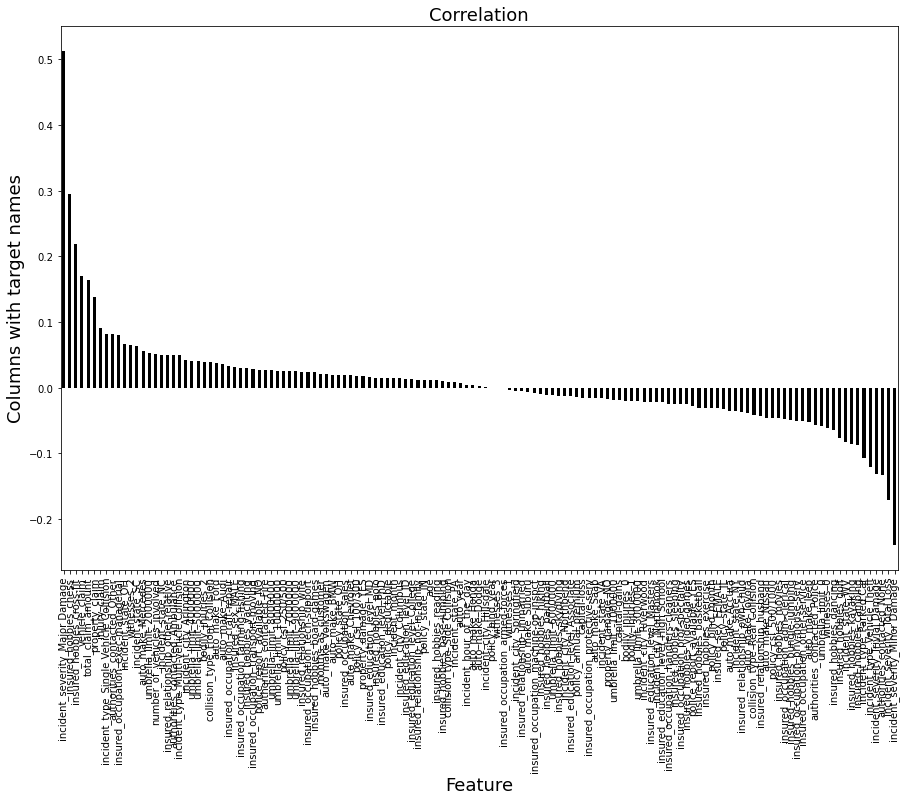

In [97]:
plt.figure(figsize = (15, 10))
encoded_df1.corr()['fraud_reported'].sort_values(ascending = False).drop(['fraud_reported']).plot(kind = 'bar', color = 'black')
plt.xlabel( 'Feature', fontsize = 18)
plt.ylabel( 'Columns with target names', fontsize = 18)
plt.title ('Correlation', fontsize = 18)
plt.show()

In [98]:
# Top two column which are positively impecting to target variable as mentioned below:
# incident_severity_major_Demage
# insured_hobbies_chess

# Top two column which are negatively impecting to target variable as mentioned below:
# incident_severity_minor damage
# incident_serverity_total_loss

### Remove Outliers

##### using zscore technique

In [99]:
from scipy.stats import zscore

In [100]:
# Zscore operation to remove outliers
z = np.abs(zscore(encoded_df1) )
df_z = encoded_df1[(z < 3).all(axis = 1)] 
df_z.shape

# (0, 138)

(0, 138)

In [101]:
((encoded_df1.shape[0] - df_z.shape[0] ) / encoded_df1.shape[0] ) * 100

# As by this method we are getting total loss, we cannot use this method
# 100.0

100.0

##### Using IQR technique

In [102]:
Q1 = encoded_df1.quantile(0.25)
Q3 = encoded_df1.quantile(0.75)
IQR = Q3 - Q1 

In [103]:
df_IQR = encoded_df1[~((encoded_df1 < (Q1 - 1.5*IQR) ) | (encoded_df1 > (Q3 + 1.5*IQR) )).any(axis = 1) ] 
df_IQR.shape   
# (0, 138)

(0, 138)

In [104]:
((encoded_df1.shape[0] - df_IQR.shape[0] ) / encoded_df1.shape[0] ) * 100

# Total data loss found by both methods zscore and IQR therefore we will leave data as it is
# 100.0

100.0

### Seperating Data into x and y form

In [105]:
# x is training dataset and y is target variable
x = encoded_df1.drop(columns = ['fraud_reported'])
y = encoded_df1['fraud_reported']

print(x.shape)
print(y.shape)

# (1000, 137)
# (1000,)

(1000, 137)
(1000,)


In [106]:
y.unique()
# array([1, 0])

array([1, 0])

### Apply SMOTE Technique to the target variable

In [107]:
y.value_counts()
# 0    753
# 1    247

0    753
1    247
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

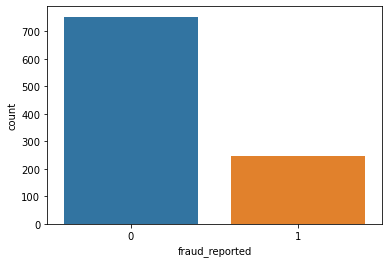

In [108]:
sns.countplot(y)

In [109]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [110]:
x, y = smote.fit_resample(x,y)

In [111]:
y.value_counts()

# 1    753
# 0    753

0    753
1    753
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

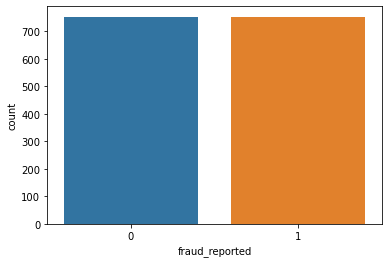

In [112]:
sns.countplot(y)

### Remove Skewness

In [113]:
num_col

# ['months_as_customer', 'age', 'policy_deductable',
#        'policy_annual_premium', 'capital-gains', 'capital-loss',
#        'incident_hour_of_the_day', 'number_of_vehicles_involved',
#        'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
#        'auto_year', 'policy_bind_month', 'policy_bind_year', 'incident_month']

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'policy_bind_month', 'policy_bind_year', 'incident_month'],
      dtype='object')

In [114]:
x[num_col].skew()

# months_as_customer             0.315370
# age                            0.456930
# policy_deductable              0.445067
# policy_annual_premium          0.023128
# capital-gains                  0.503002
# capital-loss                  -0.372481
# incident_hour_of_the_day      -0.045700
# number_of_vehicles_involved    0.574929
# total_claim_amount            -0.804762
# injury_claim                   0.185897
# property_claim                 0.299088
# vehicle_claim                 -0.840243
# auto_year                     -0.036781
# policy_bind_month              0.021845
# policy_bind_year               0.057067
# incident_month                 1.410183

months_as_customer             0.315370
age                            0.456930
policy_deductable              0.445067
policy_annual_premium          0.023128
capital-gains                  0.503002
capital-loss                  -0.372481
incident_hour_of_the_day      -0.045700
number_of_vehicles_involved    0.574929
total_claim_amount            -0.804762
injury_claim                   0.185897
property_claim                 0.299088
vehicle_claim                 -0.840243
auto_year                     -0.036781
policy_bind_month              0.021845
policy_bind_year               0.057067
incident_month                 1.410183
dtype: float64

In [115]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [116]:
x[num_col] = pt.fit_transform(x[num_col])
# applying to skewed columns of dataset

In [118]:
x[num_col].skew()

# months_as_customer            -0.116620
# age                           -0.002556
# policy_deductable             -0.000022
# policy_annual_premium          0.010234
# capital-gains                  0.064350
# capital-loss                   0.104899
# incident_hour_of_the_day      -0.239569
# number_of_vehicles_involved    0.348569
# total_claim_amount            -0.465426
# injury_claim                  -0.402380
# property_claim                -0.309880
# vehicle_claim                 -0.473897
# auto_year                     -0.007729
# policy_bind_month             -0.143276
# policy_bind_year               0.035403
# incident_month                 0.287268

months_as_customer            -0.116620
age                           -0.002556
policy_deductable             -0.000022
policy_annual_premium          0.010234
capital-gains                  0.064350
capital-loss                   0.104899
incident_hour_of_the_day      -0.239569
number_of_vehicles_involved    0.348569
total_claim_amount            -0.465426
injury_claim                  -0.402380
property_claim                -0.309880
vehicle_claim                 -0.473897
auto_year                     -0.007729
policy_bind_month             -0.143276
policy_bind_year               0.035403
incident_month                 0.287268
dtype: float64

In [119]:
# all numeric columns are showing skewness value which is in acceptable range, Now, we can move ahead

### Multicoliearity

##### Using VIF Technique

In [120]:
# using VIF Technique
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [121]:
# function to calculate VIF
def cal_vif(data):   
    vif = pd.DataFrame()
    vif['Columns Name'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return (vif)

In [122]:
cal_vif(x[num_col])

# Columns Name	VIF
# 0	months_as_customer	5.028574
# 1	age	5.031739
# 2	policy_deductable	1.023939
# 3	policy_annual_premium	1.021496
# 4	capital-gains	1.027565
# 5	capital-loss	1.026092
# 6	incident_hour_of_the_day	1.070295
# 7	number_of_vehicles_involved	1.133955
# 8	total_claim_amount	174.574957
# 9	injury_claim	9.291624
# 10	property_claim	9.623759
# 11	vehicle_claim	84.605985
# 12	auto_year	1.017891
# 13	policy_bind_month	1.018528
# 14	policy_bind_year	1.025317
# 15	incident_month	1.015612

Columns Name         VIF
0            months_as_customer    5.028574
1                           age    5.031739
2             policy_deductable    1.023939
3         policy_annual_premium    1.021496
4                 capital-gains    1.027565
5                  capital-loss    1.026092
6      incident_hour_of_the_day    1.070295
7   number_of_vehicles_involved    1.133955
8            total_claim_amount  174.574957
9                  injury_claim    9.291624
10               property_claim    9.623759
11                vehicle_claim   84.605985
12                    auto_year    1.017891
13            policy_bind_month    1.018528
14             policy_bind_year    1.025317
15               incident_month    1.015612

In [123]:
# As we have found that total_claim_amount column is showing very high vif value, mean this column is 
# creating multicolinearity in the dataset, therefore it would be better to delete this columns
x.drop(columns = 'total_claim_amount', inplace = True )

In [124]:
num_col = ['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved', 
           'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'policy_bind_month', 'policy_bind_year', 'incident_month']

In [125]:
cal_vif(x[num_col])

# Columns Name	VIF
# 0	months_as_customer	5.017822
# 1	age	5.018306
# 2	policy_deductable	1.023627
# 3	policy_annual_premium	1.015532
# 4	capital-gains	1.027295
# 5	capital-loss	1.024846
# 6	incident_hour_of_the_day	1.067298
# 7	number_of_vehicles_involved	1.082323
# 8	injury_claim	2.119948
# 9	property_claim	2.357579
# 10	vehicle_claim	3.100308
# 11	auto_year	1.017889
# 12	policy_bind_month	1.018397
# 13	policy_bind_year	1.024885
# 14	incident_month	1.013847

Columns Name       VIF
0            months_as_customer  5.017822
1                           age  5.018306
2             policy_deductable  1.023627
3         policy_annual_premium  1.015532
4                 capital-gains  1.027295
5                  capital-loss  1.024846
6      incident_hour_of_the_day  1.067298
7   number_of_vehicles_involved  1.082323
8                  injury_claim  2.119948
9                property_claim  2.357579
10                vehicle_claim  3.100308
11                    auto_year  1.017889
12            policy_bind_month  1.018397
13             policy_bind_year  1.024885
14               incident_month  1.013847

In [126]:
# All vif values of column are in acceptable range now, we can move ahead

## Scaling

In [128]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [129]:
# x_scale = ss.fit_transform(x)
# x = pd.DataFrame(x_scale, columns = x.columns)
x[num_col] =  ss.fit_transform(x[num_col])

In [130]:
x.head(2)

months_as_customer       age  policy_deductable  policy_annual_premium  \
0            1.072400  1.043677           0.006998               0.643762   
1            0.268769  0.427665           1.304066              -0.250674   

   capital-gains  capital-loss  incident_hour_of_the_day  \
0       1.046865      1.057891                 -0.961104   
1      -0.970196      1.057891                 -0.469827   

   number_of_vehicles_involved  injury_claim  property_claim  vehicle_claim  \
0                    -0.863305     -0.117770        1.071917       0.720579   
1                    -0.863305     -1.687808       -1.737443      -1.963037   

   auto_year  policy_bind_month  policy_bind_year  incident_month  \
0  -0.193381           1.112181          1.818778       -1.076237   
1   0.343965          -0.061739          0.662996       -1.076237   

   policy_state_IL  policy_state_IN  policy_state_OH  policy_csl_100/300  \
0                0                0                1                   0   
1                0                1                0                   0   

   policy_csl_250/500  policy_csl_500/1000  umbrella_limit_-1000000  \
0                   1                    0                        0   
1                   1                    0                        0   

   umbrella_limit_0  umbrella_limit_2000000  umbrella_limit_3000000  \
0                 1                       0                       0   
1                 0                       0                       0   

   umbrella_limit_4000000  umbrella_limit_5000000  umbrella_limit_6000000  \
0                       0                       0                       0   
1                       0                       1                       0   

   umbrella_limit_7000000  umbrella_limit_8000000  umbrella_limit_9000000  \
0                       0                       0                       0   
1                       0                       0                       0   

   umbrella_limit_10000000  insured_sex_FEMALE  insured_sex_MALE  \
0                        0                   0                 1   
1                        0                   0                 1   

   insured_education_level_Associate  insured_education_level_College  \
0                                  0                                0   
1                                  0                                0   

   insured_education_level_High School  insured_education_level_JD  \
0                                    0                           0   
1                                    0                           0   

   insured_education_level_MD  insured_education_level_Masters  \
0                           1                                0   
1                           1                                0   

   insured_education_level_PhD  insured_occupation_adm-clerical  \
0                            0                                0   
1                            0                                0   

   insured_occupation_armed-forces  insured_occupation_craft-repair  \
0                                0                                1   
1                                0                                0   

   insured_occupation_exec-managerial  insured_occupation_farming-fishing  \
0                                   0                                   0   
1                                   0                                   0   

   insured_occupation_handlers-cleaners  insured_occupation_machine-op-inspct  \
0                                     0                                     0   
1                                     0                                     1   

   insured_occupation_other-service  insured_occupation_priv-house-serv  \
0                                 0                                   0   
1                                 0                                   0   

   insured_occupation_prof-specialty  insured_occupation_protective-se

In [131]:
y.unique()

array([1, 0])

### Machine Learning

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [133]:
def best_randomstate (model, x, y):
    best_fit = []
    for i in range(0,100 ) :
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        m = model()
        m.fit(x_train, y_train)
        m_predict_train = m.predict(x_train)
        m_predict_test = m.predict(x_test)

        training = accuracy_score(m_predict_train, y_train)
        testing = accuracy_score(m_predict_test, y_test)

    #     print('At random state', i, 'the training accuracy is :-', training2)
    #     print('At random state', i, 'the testing accuracy is :-', testing2) 
    #     print('\n')

        if np.abs(round(training, 2) - round(testing, 2)) < 0.02:
            best_fit.append(i)
    return (best_fit)

In [134]:
def check_model (model, x, y, r_list):
    for i in r_list :
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        m = model()
        m.fit(x_train, y_train)
        m_predict_train = m.predict(x_train)
        m_predict_test = m.predict(x_test)

        training = accuracy_score(m_predict_train, y_train)
        testing = accuracy_score(m_predict_test, y_test)

        print('At random state', i, 'the training accuracy is ', training)
        print('At random state', i, 'the testing accuracy is ', testing) 
        print('_________________________________________________________________')

In [135]:
def train(algo, x, y, best_fit):
    # train the model
    model = algo()
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = best_fit)
    model.fit(x_train, y_train)
    
    # predict the training set
    pred = model.predict(x_test)
    m_pred = model.predict(x_train)
    
    training = accuracy_score(m_pred, y_train)
    testing = accuracy_score(pred, y_test)

    print('Training accuracy is : ', training)
    print('Testing accuracy is :', testing) 
    
    print('__________________________________________________________________')
    print('Classification Report: \n', classification_report(pred, y_test) )
    print('Confusion Matrix: \n', confusion_matrix(pred, y_test) )
    print('___________________________________________________________________')
    print('Cross value score')
    
    # perform cross-validation
    for i in range(4, 12):
        cv_score = cross_val_score(model, x, y, cv = i ).mean()
        print('cv score',  cv_score ,'at', i, 'cross fold')


#### Model 1: LogisticRegression

In [139]:
best_fit1 = best_randomstate (LogisticRegression, x, y)
print(best_fit1)

[87]


In [140]:
check_model(LogisticRegression, x, y,best_fit1)

At random state 87 the training accuracy is  0.920303605313093
At random state 87 the testing accuracy is  0.9070796460176991
_________________________________________________________________


In [141]:
train(LogisticRegression, x, y, 87)

Training accuracy is :  0.920303605313093
Testing accuracy is : 0.9070796460176991
__________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       234
           1       0.92      0.89      0.90       218

    accuracy                           0.91       452
   macro avg       0.91      0.91      0.91       452
weighted avg       0.91      0.91      0.91       452

Confusion Matrix: 
 [[216  18]
 [ 24 194]]
___________________________________________________________________
Cross value score
cv score 0.8394449461030533 at 4 cross fold
cv score 0.8547270687113595 at 5 cross fold
cv score 0.852589641434263 at 6 cross fold
cv score 0.8586809400762888 at 7 cross fold
cv score 0.862145390070922 at 8 cross fold
cv score 0.8675228907264835 at 9 cross fold
cv score 0.8727196467991171 at 10 cross fold
cv score 0.8679105351496936 at 11 cross fold


In [682]:
# Training accuracy is :  0.920303605313093
# Testing accuracy is : 0.9070796460176991
# And CV value of: 0.87271964 at Cross fold 10

#### Model 2: AdaBoostClassifier

In [142]:
from sklearn.ensemble import AdaBoostClassifier

In [143]:
best_fit2 = best_randomstate (AdaBoostClassifier, x, y)
best_fit2

[3, 12, 15, 82]

In [144]:
check_model(AdaBoostClassifier, x, y, best_fit2)

At random state 3 the training accuracy is  0.9013282732447818
At random state 3 the testing accuracy is  0.8893805309734514
_________________________________________________________________
At random state 12 the training accuracy is  0.8984819734345351
At random state 12 the testing accuracy is  0.8893805309734514
_________________________________________________________________
At random state 15 the training accuracy is  0.9041745730550285
At random state 15 the testing accuracy is  0.8871681415929203
_________________________________________________________________
At random state 82 the training accuracy is  0.9041745730550285
At random state 82 the testing accuracy is  0.8915929203539823
_________________________________________________________________


In [187]:
# AdaBoostClassifier is giving best Accuracy at random state 82

In [145]:
train(AdaBoostClassifier, x, y, 82)

Training accuracy is :  0.9041745730550285
Testing accuracy is : 0.8915929203539823
__________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       234
           1       0.88      0.90      0.89       218

    accuracy                           0.89       452
   macro avg       0.89      0.89      0.89       452
weighted avg       0.89      0.89      0.89       452

Confusion Matrix: 
 [[207  27]
 [ 22 196]]
___________________________________________________________________
Cross value score
cv score 0.8480709266888651 at 4 cross fold
cv score 0.8527183120283383 at 5 cross fold
cv score 0.8452855245683931 at 6 cross fold
cv score 0.8513750461424879 at 7 cross fold
cv score 0.8528474332995609 at 8 cross fold
cv score 0.858231948800811 at 9 cross fold
cv score 0.867439293598234 at 10 cross fold
cv score 0.862601975096608 at 11 cross fold


In [189]:
# Training accuracy is :  0.9041745730550285
# Testing accuracy is : 0.8915929203539823
# Highest CV score 0.86743929 at cross fold 10

#### Model 3: GradientBoostingClassifier

In [154]:
from sklearn.ensemble import GradientBoostingClassifier

In [146]:
best_fit3 = best_randomstate (GradientBoostingClassifier, x, y)
best_fit3

[]

In [149]:
max_acc = 0
random_s = 0

for i in range(0, 151):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    model = GradientBoostingClassifier()
    model.fit(x_train, y_train)
    model_pred = model.predict(x_test)
    acc = accuracy_score(model_pred, y_test)
    
    if acc > max_acc:
        max_acc = acc
        random_s = i
print('Model is giving best accurancy', max_acc, 'on random state of', random_s )

Model is giving best accurancy 0.9137168141592921 on random state of 140


In [150]:
# Model is giving best accurancy 0.9137168141592921 on random state of 140

In [151]:
train(GradientBoostingClassifier, x, y, 140)

Training accuracy is :  0.9743833017077799
Testing accuracy is : 0.911504424778761
__________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       209
           1       0.94      0.89      0.92       243

    accuracy                           0.91       452
   macro avg       0.91      0.91      0.91       452
weighted avg       0.91      0.91      0.91       452

Confusion Matrix: 
 [[196  13]
 [ 27 216]]
___________________________________________________________________
Cross value score
cv score 0.8327871917151081 at 4 cross fold
cv score 0.8533673626542871 at 5 cross fold
cv score 0.8579017264276229 at 6 cross fold
cv score 0.8633074935400517 at 7 cross fold
cv score 0.8706975402454126 at 8 cross fold
cv score 0.8660932104045876 at 9 cross fold
cv score 0.868026490066225 at 10 cross fold
cv score 0.8745413560248253 at 11 cross fold


In [152]:
# Training accuracy is :  0.9743833017077799
# Testing accuracy is : 0.911504424778761
# Giving highest cv score 0.87454135 at cross fold 11

### Model 4:  DecisionTreeClassifier

In [155]:
from sklearn.tree import DecisionTreeClassifier

In [156]:
best_fit4 = best_randomstate (DecisionTreeClassifier, x, y)
best_fit4

[]

In [157]:
max_acc = 0
random_s = 0

for i in range(0, 151):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    model = DecisionTreeClassifier()
    model.fit(x_train, y_train)
    model_pred = model.predict(x_test)
    acc = accuracy_score(model_pred, y_test)
    
    if acc > max_acc:
        max_acc = acc
        random_s = i
print('Model is giving best accurancy', max_acc, 'on random state of', random_s )

Model is giving best accurancy 0.8561946902654868 on random state of 85


In [158]:
# Model is giving best accurancy 0.8561946902654868 on random state of 85

In [159]:
train(DecisionTreeClassifier, x, y, 85)

Training accuracy is :  1.0
Testing accuracy is : 0.8451327433628318
__________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.83      0.84       217
           1       0.85      0.86      0.85       235

    accuracy                           0.85       452
   macro avg       0.84      0.84      0.84       452
weighted avg       0.85      0.85      0.85       452

Confusion Matrix: 
 [[181  36]
 [ 34 201]]
___________________________________________________________________
Cross value score
cv score 0.8048616598002144 at 4 cross fold
cv score 0.8101691931970694 at 5 cross fold
cv score 0.8147410358565738 at 6 cross fold
cv score 0.8141595914851728 at 7 cross fold
cv score 0.814913317572892 at 8 cross fold
cv score 0.8308858473529132 at 9 cross fold
cv score 0.8235099337748345 at 10 cross fold
cv score 0.817435301924353 at 11 cross fold


In [161]:
# Training accuracy is :  1.0
# Testing accuracy is : 0.8451327433628318
# cv score 0.830885847  at cross fold 9

In [210]:
# # Observation 

# Model	                          Train Accuracy	   Test Accuracy	  CV	           Difference
# LogisticRegression	           0.9203036	       0.90707964	    0.87271964	       0.03436
# AdaBoostClassifier	           0.90417457	       0.89159292	    0.86743929	       0.02415363
# GradientBoostingClassifier	   0.9743833	       0.9115044	    0.87454135	       0.03696305
# DecisionTreeClassifier	       1	               0.845132743	    0.830885847	       0.014246896

In [162]:
# Logistice model is giving good performance and it is also giving almost accuracy of train and test dataset
# but having more differnce cv and accuracy as compaer to Adaboostclassifer

# AdaBoostClassifer: is also giving almost same accuracy of test and train data, and having very low 
# difference between cv and accuracy of model

# GradientBoostingClassifier is model is performing good but having difference in accuracy of test and 
# train data accuracy
# GradientBoost is showing highest difference of cv and accuracy as compare to other 3 model

# DEcision tree is giving overfitted model ,

# Hence as per all observation, we will try ensembles techniques the AdaBoostmodel to finalize it as 
# final model

##### Ensemble Technique of AdaBoostClassifier

In [163]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 82)

# AdaBoostClassifier is givng good accuracy at random state 81  and 0.86743929 at cross fold 10
# Therefore, we will use these values for further proceedings 

#### Hyper Parameter Tuning

In [164]:
# Parameter for AdaBoostingClassifier
parameter = {'base_estimator' : [LogisticRegression(), None], 
             'learning_rate' : [0.1, 0.01],
             'algorithm' : ['SAMME', 'SAMME.R'],
             'n_estimators': [100, 50, 10]  } 

In [166]:
gcv = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = parameter, cv = 10)
gcv.fit(x_train, y_train)

# GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
#              param_grid={'algorithm': ['SAMME', 'SAMME.R'],
#                          'base_estimator': [LogisticRegression(), None],
#                          'learning_rate': [0.1, 0.01],
#                          'n_estimators': [100, 50, 10]})

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'base_estimator': [LogisticRegression(), None],
                         'learning_rate': [0.1, 0.01],
                         'n_estimators': [100, 50, 10]})

In [167]:
gcv.best_params_
# {'algorithm': 'SAMME',
#  'base_estimator': LogisticRegression(),
#  'learning_rate': 0.1,
#  'n_estimators': 100}

{'algorithm': 'SAMME',
 'base_estimator': LogisticRegression(),
 'learning_rate': 0.1,
 'n_estimators': 100}

##### Selection of best random_state 

In [174]:
best_fit = []
for i in range(0, 200) :
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    m = AdaBoostClassifier(algorithm = 'SAMME', base_estimator = LogisticRegression(), learning_rate = 0.1, n_estimators = 100)
    m.fit(x_train, y_train)
    m_predict_train = m.predict(x_train)
    m_predict_test = m.predict(x_test)

    training = accuracy_score(y_train, m_predict_train )
    testing = accuracy_score(y_test, m_predict_test)

    #     print('At random state', i, 'the training accuracy is :-', training2)
    #     print('At random state', i, 'the testing accuracy is :-', testing2) 
    #     print('\n')

    if np.abs(round(training, 2) - round(testing, 2)) < 0.005:
        best_fit.append(i)
print(best_fit)
# [8, 93, 142, 198]

[8, 93, 142, 198]


In [175]:
max_acc = 0
random_s = 0

for i in best_fit:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    model = AdaBoostClassifier(algorithm = 'SAMME', base_estimator = LogisticRegression(), learning_rate = 0.1, n_estimators = 100)
    model.fit(x_train, y_train)
    model_pred = model.predict(x_test)
    acc = accuracy_score(model_pred, y_test)
    
    if acc > max_acc:
        max_acc = acc
        random_s = i
print('Model is giving best accurancy', max_acc, 'on random state of', random_s )

Model is giving best accurancy 0.8960176991150443 on random state of 8


In [ ]:
# Model is giving best accurancy 0.8960176991150443 on random state of 8

#### Final Model (AdaBoostClassifier)

In [178]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 8)
final_model = AdaBoostClassifier(algorithm = 'SAMME', base_estimator = LogisticRegression(), learning_rate = 0.1, n_estimators = 100)
final_model.fit(x_train, y_train)
predict_train = final_model.predict(x_train)
predict_test = final_model.predict(x_test)

training = accuracy_score(predict_train, y_train)
testing = accuracy_score(predict_test, y_test)

print('At random state', i, 'the training accuracy is :', training)
print('At random state', i, 'the testing accuracy is :'  , testing) 
print('_________________________________________________________________')
print('Classification Report: \n', classification_report(predict_test, y_test) )
print('Confusion Matrix: \n', confusion_matrix(predict_test, y_test) )
print('___________________________________________________________________')

At random state 11 the training accuracy is : 0.8994307400379506
At random state 11 the testing accuracy is : 0.8960176991150443
_________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       250
           1       0.88      0.89      0.88       202

    accuracy                           0.90       452
   macro avg       0.89      0.90      0.89       452
weighted avg       0.90      0.90      0.90       452

Confusion Matrix: 
 [[226  24]
 [ 23 179]]
___________________________________________________________________


In [227]:
# As we have applied ensemble technique on AdaBoostingClassifier,
# we found little bit testing accuracy have increased from  0.89159292 to 0.896017699



### AOC - ROC Curve (Loan Status :  Yes)

In [181]:
final_pred_prob = final_model.predict_proba( x_test)[:, 1]  #  probability of getting 1
# Probability of predicting fraud 
# 1: Yes  fraud
# 0: No  Fraud

In [182]:
fpr, tpr, threshols = roc_curve(y_test, final_pred_prob)  
#  By the use of fpr and tpr we create AUC ROC curve

In [183]:
# fpr
# tpr
# threshols

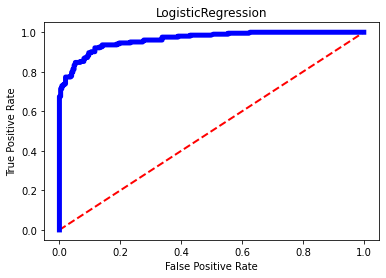

In [184]:
plt.plot([0, 1], [0, 1], 'k--', color = 'red', lw = 2)
plt.plot( fpr, tpr, color = 'b', lw = 5, label = 'ROC Curve')   # graph for AOC ROC curve
plt.xlabel('False Positive Rate')  # x axis
plt.ylabel('True Positive Rate')   # y axis
plt.title('LogisticRegression')  # Title
plt.show()

In [185]:
# As our model is giving accuracy of 89.6 % , therefore, curve is not proper sharp

In [186]:
auc_score = roc_auc_score(y_test, final_model.predict(x_test))
auc_score

# 0.8947019605515659

0.8947019605515659

### Deploy Model

In [187]:
import pickle
filename = 'fraud_predictor.pkl'                 # model name 
pickle.dump(final_model, open(filename, 'wb'))         # operation to deploy model

### Loading model

In [188]:
load_model =  pickle.load(open('fraud_predictor.pkl', 'rb'))    # loading deployed model
result = load_model.score(x_test, y_test)                            
print(result) 

# 0.8960176991150443

0.8960176991150443


### Conclusion

In [189]:
original = np.array(y_test)
predicted = np.array(load_model.predict(x_test))  
# convert columns in to np.array 

In [190]:
print(predicted.shape)
print(original.shape)
print(x_test.shape)
print(y_test.shape)

# (452,)
# (452,)
# (452, 136)
# (452,

(452,)
(452,)
(452, 136)
(452,)


In [191]:
conclusion = pd.DataFrame({'Original fraud_reported': original, 'Predicted fraud_reported': predicted}, index = range(len(original)))
# Dataframe creation

In [192]:
pd.set_option('display.max_rows', None)  # To maximize the rows
conclusion.head()

Original fraud_reported  Predicted fraud_reported
0                        1                         1
1                        0                         0
2                        0                         0
3                        1                         1
4                        1                         1

In [196]:
conclusion.sample(10)

Original fraud_reported  Predicted fraud_reported
70                         1                         1
219                        1                         1
324                        0                         0
236                        0                         0
109                        1                         1
187                        1                         1
208                        1                         1
119                        0                         1
279                        0                         0
188                        1                         1